In [1]:
%run My_function.ipynb

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
print ("Librairies utilisées :")
print ("Pandas :", pd.__version__)
print ("Numpy :", np.__version__)
print ("Seaborn :", sns.__version__)

Librairies utilisées :
Pandas : 1.4.4
Numpy : 1.21.5
Seaborn : 0.11.2


# Introduction

<div class="oc-richContent root-0-2-1" data-videotitle="video" data-current-user-id="328418" data-project-id="862" data-codio-button-label="Accéder au code"><p>&nbsp;</p>

<p style="text-align:center;">Vous travaillez chez La poule qui chante, une entreprise française d’agroalimentaire. Elle souhaite se développer à l'international.</p>
<p><img src="https://user.oc-static.com/upload/2020/11/24/16062164030098_image2.png" alt=""></p>
<p>&nbsp;</p>
<p>L'international, oui, mais pour l'instant, le champ des possibles est bien large : aucun pays particulier ni aucun continent n'est pour le moment choisi. Tous les pays sont envisageables !</p>
<p>Votre manager, Patrick, vous briefe par un e-mail :</p><br/>
<div class="oc-tableContainer"><table>
<tbody>
<tr>
<td style="text-align:left;"><strong>De</strong> : Patrick<br><strong>À </strong>: Moi<br><strong>Objet</strong> : Lancement mission data international</td>
</tr>
<tr>
<td style="font-size:13px;">
<p>Salut !</p>
<p>Comme on en a déjà brièvement parlé, je te fais ce mail pour te briefer sur la mission d’analyse pour le lancement à l’international.</p>
<p>Ton objectif sera de proposer une première analyse des groupements de pays que l’on peut cibler pour exporter nos poulets. Nous approfondirons ensuite l'étude de marché.&nbsp;</p>
<p>Tu seras en totale autonomie sur ce projet, notamment sur le choix des données à analyser et même du langage à utiliser (R ou Python).&nbsp;</p>
<p>Pars des données de la FAO <em>(Food and Agriculture Organization)</em> que je te mets en pièce jointe pour faire ton analyse. Si tu veux aller plus loin, notamment avec les critères de l’analyse PESTEL, tu peux récupérer et utiliser toutes les données en <em>open data</em> que tu souhaites sur <a href="http://www.fao.org/faostat/fr/#data/">le site de la FAO</a>.</p>
<p>Pour la partie analyse, dans un premier temps j’aimerais que tu testes la classification ascendante hiérarchique, avec un dendrogramme comme visualisation. Ensuite tu pourras utiliser la méthode des k-means, afin d’affiner l’analyse et comparer les résultats des deux méthodes de clustering. N'hésite pas à prendre le temps d’analyser les centroïdes de tes classes. Tu peux également réaliser une ACP afin de visualiser les résultats de ton analyse, comprendre les groupes, les liens entre les variables, les liens entre les individus...</p>
<p>Voici ce que j’attends de toi :</p>
<ul style="text-align:left;">
<li>un notebook ou fichier R contenant la préparation, le nettoyage et l’analyse exploratoire des données ;</li>
<li>un notebook ou fichier R contenant le/les clusterings effectués, et les différentes visualisations associées ;</li>
<li>une présentation qui récapitule les points suivants :&nbsp;</li>
<ul>
<li>le contexte du projet de data analyse ;</li>
<li>votre démarche (sans entrer dans les détails mathématiques, mais en vulgarisant les sujets abordés) ;</li>
<li>vos résultats et recommandations.</li>
</ul>
</ul>
<p>&nbsp;</p>
<p>Bon courage !</p>
<p>Patrick</p>
</td>
</tr>
<tr>
<td style="text-align:left;">
<p>Pièce jointe :</p>
<ul>
<li><a href="https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-analyst/DAN-P9-data.zip">Données New Food Balances (FAO)</a></li>
</ul>
</td>
</tr>
</tbody>
</table></div>
<p>&nbsp;</p>
<p>&nbsp;Vous avez toutes les cartes en main. À vous de jouer !</p>

<p><img src="https://user.oc-static.com/upload/2023/03/15/16788716972812_Banner-Livrables.png" alt="Bannière livrables"></p>

<ol>
<li>un notebook ou fichier R contenant la préparation, le nettoyage et l’analyse exploratoire des données.</li>
<li>un notebook ou fichier R contenant le/les clusterings effectués, et les différentes visualisations associées.</li>
<li>une présentation du travail réalisé (Powerpoint ou équivalent, maximum 20 slides).</li>
</ol>

</div>

In [4]:
# On importe nos données

# Fichier CSV contenant des données sur la disponibilité alimentaire par pays en 2017
df = pd.read_csv("Données/DisponibiliteAlimentaire_2017.csv", sep=";")

indic_macro = pd.read_csv("Données/Indicateurs_macro.csv")

vie_saine = pd.read_csv("Données/Coût_et_abordabilité_d’une_alimentation_saine.csv")

series_temp = pd.read_csv("Données/Séries_temporelles_annuelles.csv")

prod_poulet = pd.read_csv("Données/production_poulet.csv")

pays_continent = pd.read_excel("Données/pays_continent.xlsx")

elevage_poulet = pd.read_csv("Données/Elevage_poulets.csv")

stabilité_politique = pd.read_csv("Données/PoliticalStability.csv", sep=";")

distance_fr_monde = pd.read_csv("Données/distance_fr_monde.csv", sep=";")


# Préparation de nos données (Import, maniplulation, nettoyage, jointure)

## Table Disponibilité Intérieure

In [5]:
display(df.head())
print(df.shape)

Code Domaine                      Domaine  Code zone ISO3         Zone  \
0          FBS  Nouveaux Bilans Alimentaire          2  AFG  Afghanistan   
1          FBS  Nouveaux Bilans Alimentaire          2  AFG  Afghanistan   
2          FBS  Nouveaux Bilans Alimentaire          2  AFG  Afghanistan   
3          FBS  Nouveaux Bilans Alimentaire          2  AFG  Afghanistan   
4          FBS  Nouveaux Bilans Alimentaire          2  AFG  Afghanistan   

   Code Élément                   Élément  Code Produit          Produit  \
0          5511                Production          2511  Blé et produits   
1          5611   Importations - Quantité          2511  Blé et produits   
2          5072        Variation de stock          2511  Blé et produits   
3          5911   Exportations - Quantité          2511  Blé et produits   
4          5301  Disponibilité intérieure          2511  Blé et produits   

   Code année  Année               Unité  Valeur Symbole  \
0        2017   2017  Milliers de tonnes  4281.0       S   
1        2017   2017  Milliers de tonnes  2302.0       S   
2        2017   2017  Milliers de tonnes  -119.0       S   
3        2017   2017  Milliers de tonnes     0.0       S   
4        2017   2017  Milliers de tonnes  6701.0       S   

  Description du Symbole  
0  Données standardisées  
1  Données standardisées  
2  Données standardisées  
3  Données standardisées  
4  Données standardisées

(176600, 15)


Pour le premier fichier, on souhaite avoir une ligne par pays avec les informations nécessaire à l'analyse. 
Pour ce faire, nous commençons par réaliser un pivot de la colonne "Element" et par "Produit" en filtrant sur la colonne "Année". Ces données seront aggrégé sur la Zone.
Ce qui nous interesse ici ce sont les données concernant les volailles. 

In [6]:
# On filtre sur l'année 2017
df = df.loc[df["Année"]==2017]

# Ce qui nous interesse, se sont les informations sur la "Viande de Volailles". On filtre
df = df.loc[df["Produit"]=="Viande de Volailles"]
df.head()

Code Domaine                      Domaine  Code zone ISO3         Zone  \
651          FBS  Nouveaux Bilans Alimentaire          2  AFG  Afghanistan   
652          FBS  Nouveaux Bilans Alimentaire          2  AFG  Afghanistan   
653          FBS  Nouveaux Bilans Alimentaire          2  AFG  Afghanistan   
654          FBS  Nouveaux Bilans Alimentaire          2  AFG  Afghanistan   
655          FBS  Nouveaux Bilans Alimentaire          2  AFG  Afghanistan   

     Code Élément                   Élément  Code Produit  \
651          5511                Production          2734   
652          5611   Importations - Quantité          2734   
653          5072        Variation de stock          2734   
654          5301  Disponibilité intérieure          2734   
655          5123                    Pertes          2734   

                 Produit  Code année  Année               Unité  Valeur  \
651  Viande de Volailles        2017   2017  Milliers de tonnes    28.0   
652  Viande de Volailles        2017   2017  Milliers de tonnes    29.0   
653  Viande de Volailles        2017   2017  Milliers de tonnes     0.0   
654  Viande de Volailles        2017   2017  Milliers de tonnes    57.0   
655  Viande de Volailles        2017   2017  Milliers de tonnes     2.0   

    Symbole Description du Symbole  
651       S  Données standardisées  
652       S  Données standardisées  
653       S  Données standardisées  
654       S  Données standardisées  
655       S  Données standardisées

Pour terminer de mettre en forme notre tableau, on fait un pivot. On souhaite que :
- Notre index soit les pays
- Nos colonnes soient les Eléments
- Nos valeurs soient les valeurs attaché aux éléments.

In [7]:
df = df.pivot(index=["Zone","ISO3"],columns="Élément", values="Valeur").reset_index()
df = df.set_index("Zone")
display(df.head())
print(df.shape)

Élément        ISO3  Alimentation pour touristes  Aliments pour animaux  \
Zone                                                                      
Afghanistan     AFG                          NaN                    NaN   
Afrique du Sud  ZAF                          0.0                    NaN   
Albanie         ALB                          NaN                    NaN   
Algérie         DZA                          0.0                    NaN   
Allemagne       DEU                          NaN                    NaN   

Élément         Autres utilisations (non alimentaire)  \
Zone                                                    
Afghanistan                                       NaN   
Afrique du Sud                                    NaN   
Albanie                                           NaN   
Algérie                                           NaN   
Allemagne                                         NaN   

Élément         Disponibilité alimentaire (Kcal/personne/jour)  \
Zone                                                             
Afghanistan                                                5.0   
Afrique du Sud                                           143.0   
Albanie                                                   85.0   
Algérie                                                   22.0   
Allemagne                                                 71.0   

Élément         Disponibilité alimentaire en quantité (kg/personne/an)  \
Zone                                                                     
Afghanistan                                                  1.53        
Afrique du Sud                                              35.69        
Albanie                                                     16.36        
Algérie                                                      6.38        
Allemagne                                                   19.47        

Élément         Disponibilité de matière grasse en quantité (g/personne/jour)  \
Zone                                                                            
Afghanistan                                                  0.33               
Afrique du Sud                                               9.25               
Albanie                                                      6.45               
Algérie                                                      1.50               
Allemagne                                                    4.16               

Élément         Disponibilité de protéines en quantité (g/personne/jour)  \
Zone                                                                       
Afghanistan                                                  0.54          
Afrique du Sud                                              14.11          
Albanie                                                      6.26          
Algérie                                                      1.97          
Allemagne                                                    7.96          

Élément         Disponibilité intérieure  Exportations - Quantité  \
Zone                                                                
Afghanistan                         57.0                      NaN   
Afrique du Sud                    2118.0                     63.0   
Albanie                             47.0                      0.0   
Algérie                            277.0                      0.0   
Allemagne                         1739.0                    646.0   

Élément         Importations - Quantité  Nourriture  Pertes  Production  \
Zone                                                                      
Afghanistan                        29.0        55.0     2.0        28.0   
Afrique du Sud                    514.0      2035.0    83.0      1667.0   
Albanie                            38.0        47.0     NaN        13.0   
Algérie                             2.0       264.0    13.0       275.0   
Allemagne                         842.0      1609.0     N

(172, 18)


Désormais nous avons une table avec 172 pays et 18 variables. 

On supprime les colonnes qui ne nous seront pas utile dans notre analyse:
- Disponibilité alimentaire (Kcal/personne/jour)
- Disponibilité alimentaire en quantité (kg/personne/an)
- Disponibilité de matière grasse en quantité (g/personne/jour)
- Disponibilité de protéines en quantité (g/personne/jour)

In [8]:
# On supprime les colonnes non souhaitées
df = df.drop(["Aliments pour animaux","Semences","Autres utilisations (non alimentaire)","Traitement","Disponibilité alimentaire (Kcal/personne/jour)","Disponibilité alimentaire en quantité (kg/personne/an)","Disponibilité de matière grasse en quantité (g/personne/jour)","Alimentation pour touristes","Résidus","Variation de stock"], axis=1)
df

Élément               ISO3  \
Zone                         
Afghanistan            AFG   
Afrique du Sud         ZAF   
Albanie                ALB   
Algérie                DZA   
Allemagne              DEU   
...                    ...   
Émirats arabes unis    ARE   
Équateur               ECU   
États-Unis d'Amérique  USA   
Éthiopie               ETH   
Îles Salomon           SLB   

Élément                Disponibilité de protéines en quantité (g/personne/jour)  \
Zone                                                                              
Afghanistan                                                         0.54          
Afrique du Sud                                                     14.11          
Albanie                                                             6.26          
Algérie                                                             1.97          
Allemagne                                                           7.96          
...                                                                  ...          
Émirats arabes unis                                                14.80          
Équateur                                                            6.15          
États-Unis d'Amérique                                              19.93          
Éthiopie                                                            0.04          
Îles Salomon                                                        1.51          

Élément                Disponibilité intérieure  Exportations - Quantité  \
Zone                                                                       
Afghanistan                                57.0                      NaN   
Afrique du Sud                           2118.0                     63.0   
Albanie                                    47.0                      0.0   
Algérie                                   277.0                      0.0   
Allemagne                                1739.0                    646.0   
...                                         ...                      ...   
Émirats arabes unis                       412.0                     94.0   
Équateur                                  341.0                      0.0   
États-Unis d'Amérique                   18266.0                   3692.0   
Éthiopie                                   14.0                      NaN   
Îles Salomon                                3.0                      0.0   

Élément                Importations - Quantité  Nourriture  Pertes  Production  
Zone                                                                            
Afghanistan                               29.0        55.0     2.0        28.0  
Afrique du Sud                           514.0      2035.0    83.0      1667.0  
Albanie                                   38.0        47.0     NaN        13.0  
Algérie                                    2.0       264.0    13.0       275.0  
Allemagne                                842.0      1609.0     NaN      1514.0  
...                                        ...         ...     ...         ...  
Émirats arabes unis                      433.0       412.0     NaN        48.0  
Équateur                                   0.0       324.0    17.0       340.0  
États-Unis d'Amérique                    123.0     18100.0     NaN     21914.0  
Éthiopie                                   1.0        14.0     1.0        14.0  
Îles Salomon                               6.0         3.0     NaN         0.0  

[172 rows x 8 columns]

/var/folders/hy/g05wz4ln30z1r5z3mv1rwd2h0000gn/T/ipykernel_52070/3125733484.py:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  moyennes = data.mean()
/var/folders/hy/g05wz4ln30z1r5z3mv1rwd2h0000gn/T/ipykernel_52070/3125733484.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  medianes = data.median()
/var/folders/hy/g05wz4ln30z1r5z3mv1rwd2h0000gn/T/ipykernel_52070/3125733484.py:15: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ecart_types = data.std()


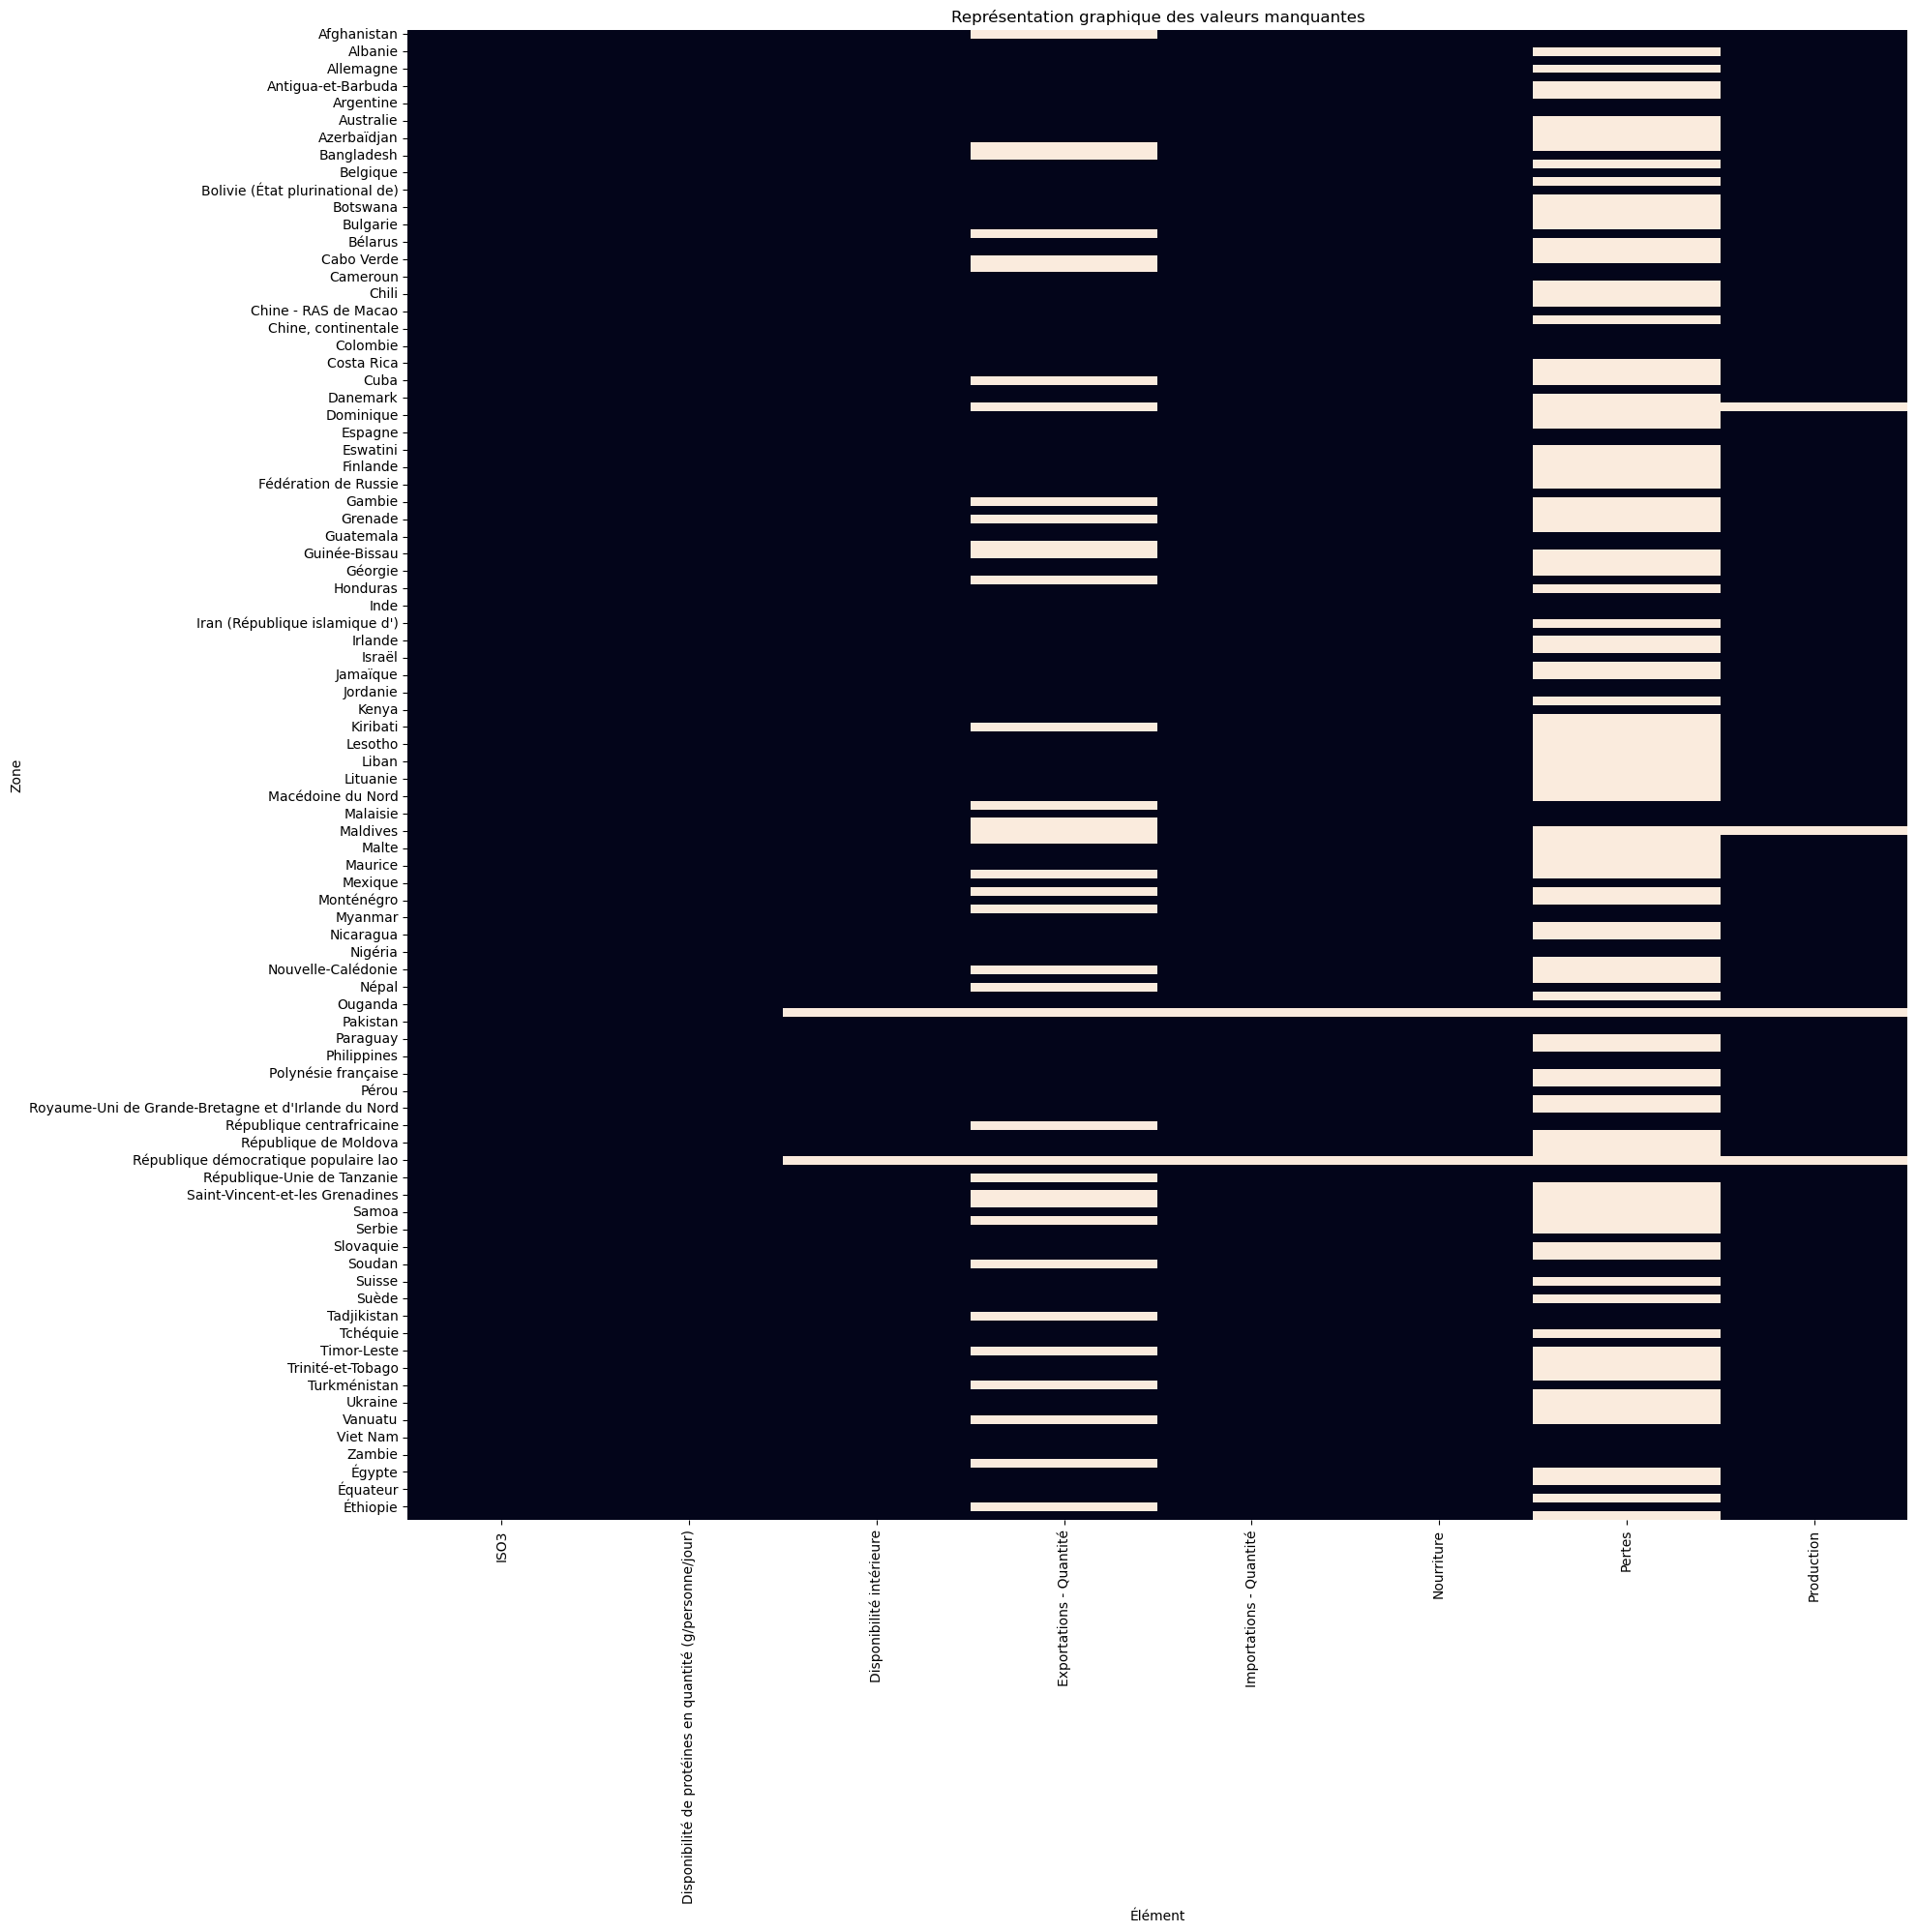

observations  variables  \
Élément                                                                       
Pertes                                                       172          8   
Exportations - Quantité                                      172          8   
Production                                                   172          8   
Disponibilité intérieure                                     172          8   
Importations - Quantité                                      172          8   
Nourriture                                                   172          8   
Disponibilité de protéines en quantité (g/perso...           172          8   
ISO3                                                         172          8   

                                                      moyennes  medianes  \
Élément                                                                    
Pertes                                               43.582090     4.000   
Exportations - Quantité                             132.185185     3.000   
Production                                          725.190476    70.000   
Disponibilité intérieure                            687.594118   100.000   
Importations - Quantité                              89.529412    16.000   
Nourriture                                          657.047059    99.500   
Disponibilité de protéines en quantité (g/perso...    7.121279     6.505   
ISO3                                                       NaN       NaN   

                                                    ecart_types   min  \
Élément                                                                 
Pertes                                               120.818816   0.0   
Exportations - Quantité                              513.784440   0.0   
Production                                          2501.457125   0.0   
Disponibilité intérieure                            2187.184747   2.0   
Importations - Quantité                              186.669983   0.0   
Nourriture                                          2136.545796   2.0   
Disponibilité de protéines en quantité (g/perso...     5.603464  0.04   
ISO3                                                        NaN   AFG   

                                                        max  \
Élément                                                       
Pertes                                                695.0   
Exportations - Quantité                              4223.0   
Production                                          21914.0   
Disponibilité intérieure                            18266.0   
Importations - Quantité                              1069.0   
Nourriture                                          18100.0   
Disponibilité de protéines en quantité (g/perso...    27.87   
ISO3                                                    ZWE   

                                                    nb_valeurs_manquantes  \
Élément                                                                     
Pertes                                                                105   
Exportations - Quantité                                                37   
Production                                                              4   
Disponibilité intérieure                                                2   
Importations - Quantité                                                 2   
Nourriture                                                              2   
Disponibilité de protéines en quantité (g/perso...                      0   
ISO3                                                                    0   

                                                    %_valeurs_manquantes  
Élément                                                                   
Pertes                                                             61.05  
Exportations - Quantité                                            21.51  
Production                                                         

In [9]:
# Après avoir supprimer les colonnes non nécessaires, on vérifie les valeurs manquantes
my_first_analyse(df).sort_values("%_valeurs_manquantes", ascending=False)

On constate graphiquement qu'il y a deux pays qui semblent ne pas avoir beaucoup de données. Nous allons vérifier. 

In [10]:
df.loc[df["Disponibilité intérieure"].isna()]

Élément                               ISO3  \
Zone                                         
Ouzbékistan                            UZB   
République démocratique populaire lao  LAO   

Élément                                Disponibilité de protéines en quantité (g/personne/jour)  \
Zone                                                                                              
Ouzbékistan                                                                         0.63          
République démocratique populaire lao                                               3.59          

Élément                                Disponibilité intérieure  \
Zone                                                              
Ouzbékistan                                                 NaN   
République démocratique populaire lao                       NaN   

Élément                                Exportations - Quantité  \
Zone                                                             
Ouzbékistan                                                NaN   
République démocratique populaire lao                      NaN   

Élément                                Importations - Quantité  Nourriture  \
Zone                                                                         
Ouzbékistan                                                NaN         NaN   
République démocratique populaire lao                      NaN         NaN   

Élément                                Pertes  Production  
Zone                                                       
Ouzbékistan                               NaN         NaN  
République démocratique populaire lao     NaN         NaN

Au vue du peu de données que nous avons, je décide de supprimer ces deux pays. 

In [11]:
df = df.drop(["Ouzbékistan","République démocratique populaire lao"], axis=0)

On peut désormais s'attaquer aux valeurs manquantes. Les valeurs manquantes seront remplacées par 0.  

In [12]:
df = my_missing_values(df, apply_all=True, strategie="valeur_constante")

Entrez une valeur constante pour remplacer les données manquantes : 0


On vérifie que les données manquantes ont bien été complétée

/var/folders/hy/g05wz4ln30z1r5z3mv1rwd2h0000gn/T/ipykernel_52070/3125733484.py:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  moyennes = data.mean()
/var/folders/hy/g05wz4ln30z1r5z3mv1rwd2h0000gn/T/ipykernel_52070/3125733484.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  medianes = data.median()
/var/folders/hy/g05wz4ln30z1r5z3mv1rwd2h0000gn/T/ipykernel_52070/3125733484.py:15: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ecart_types = data.std()
/var/folders/hy/g05wz4ln30z1r5

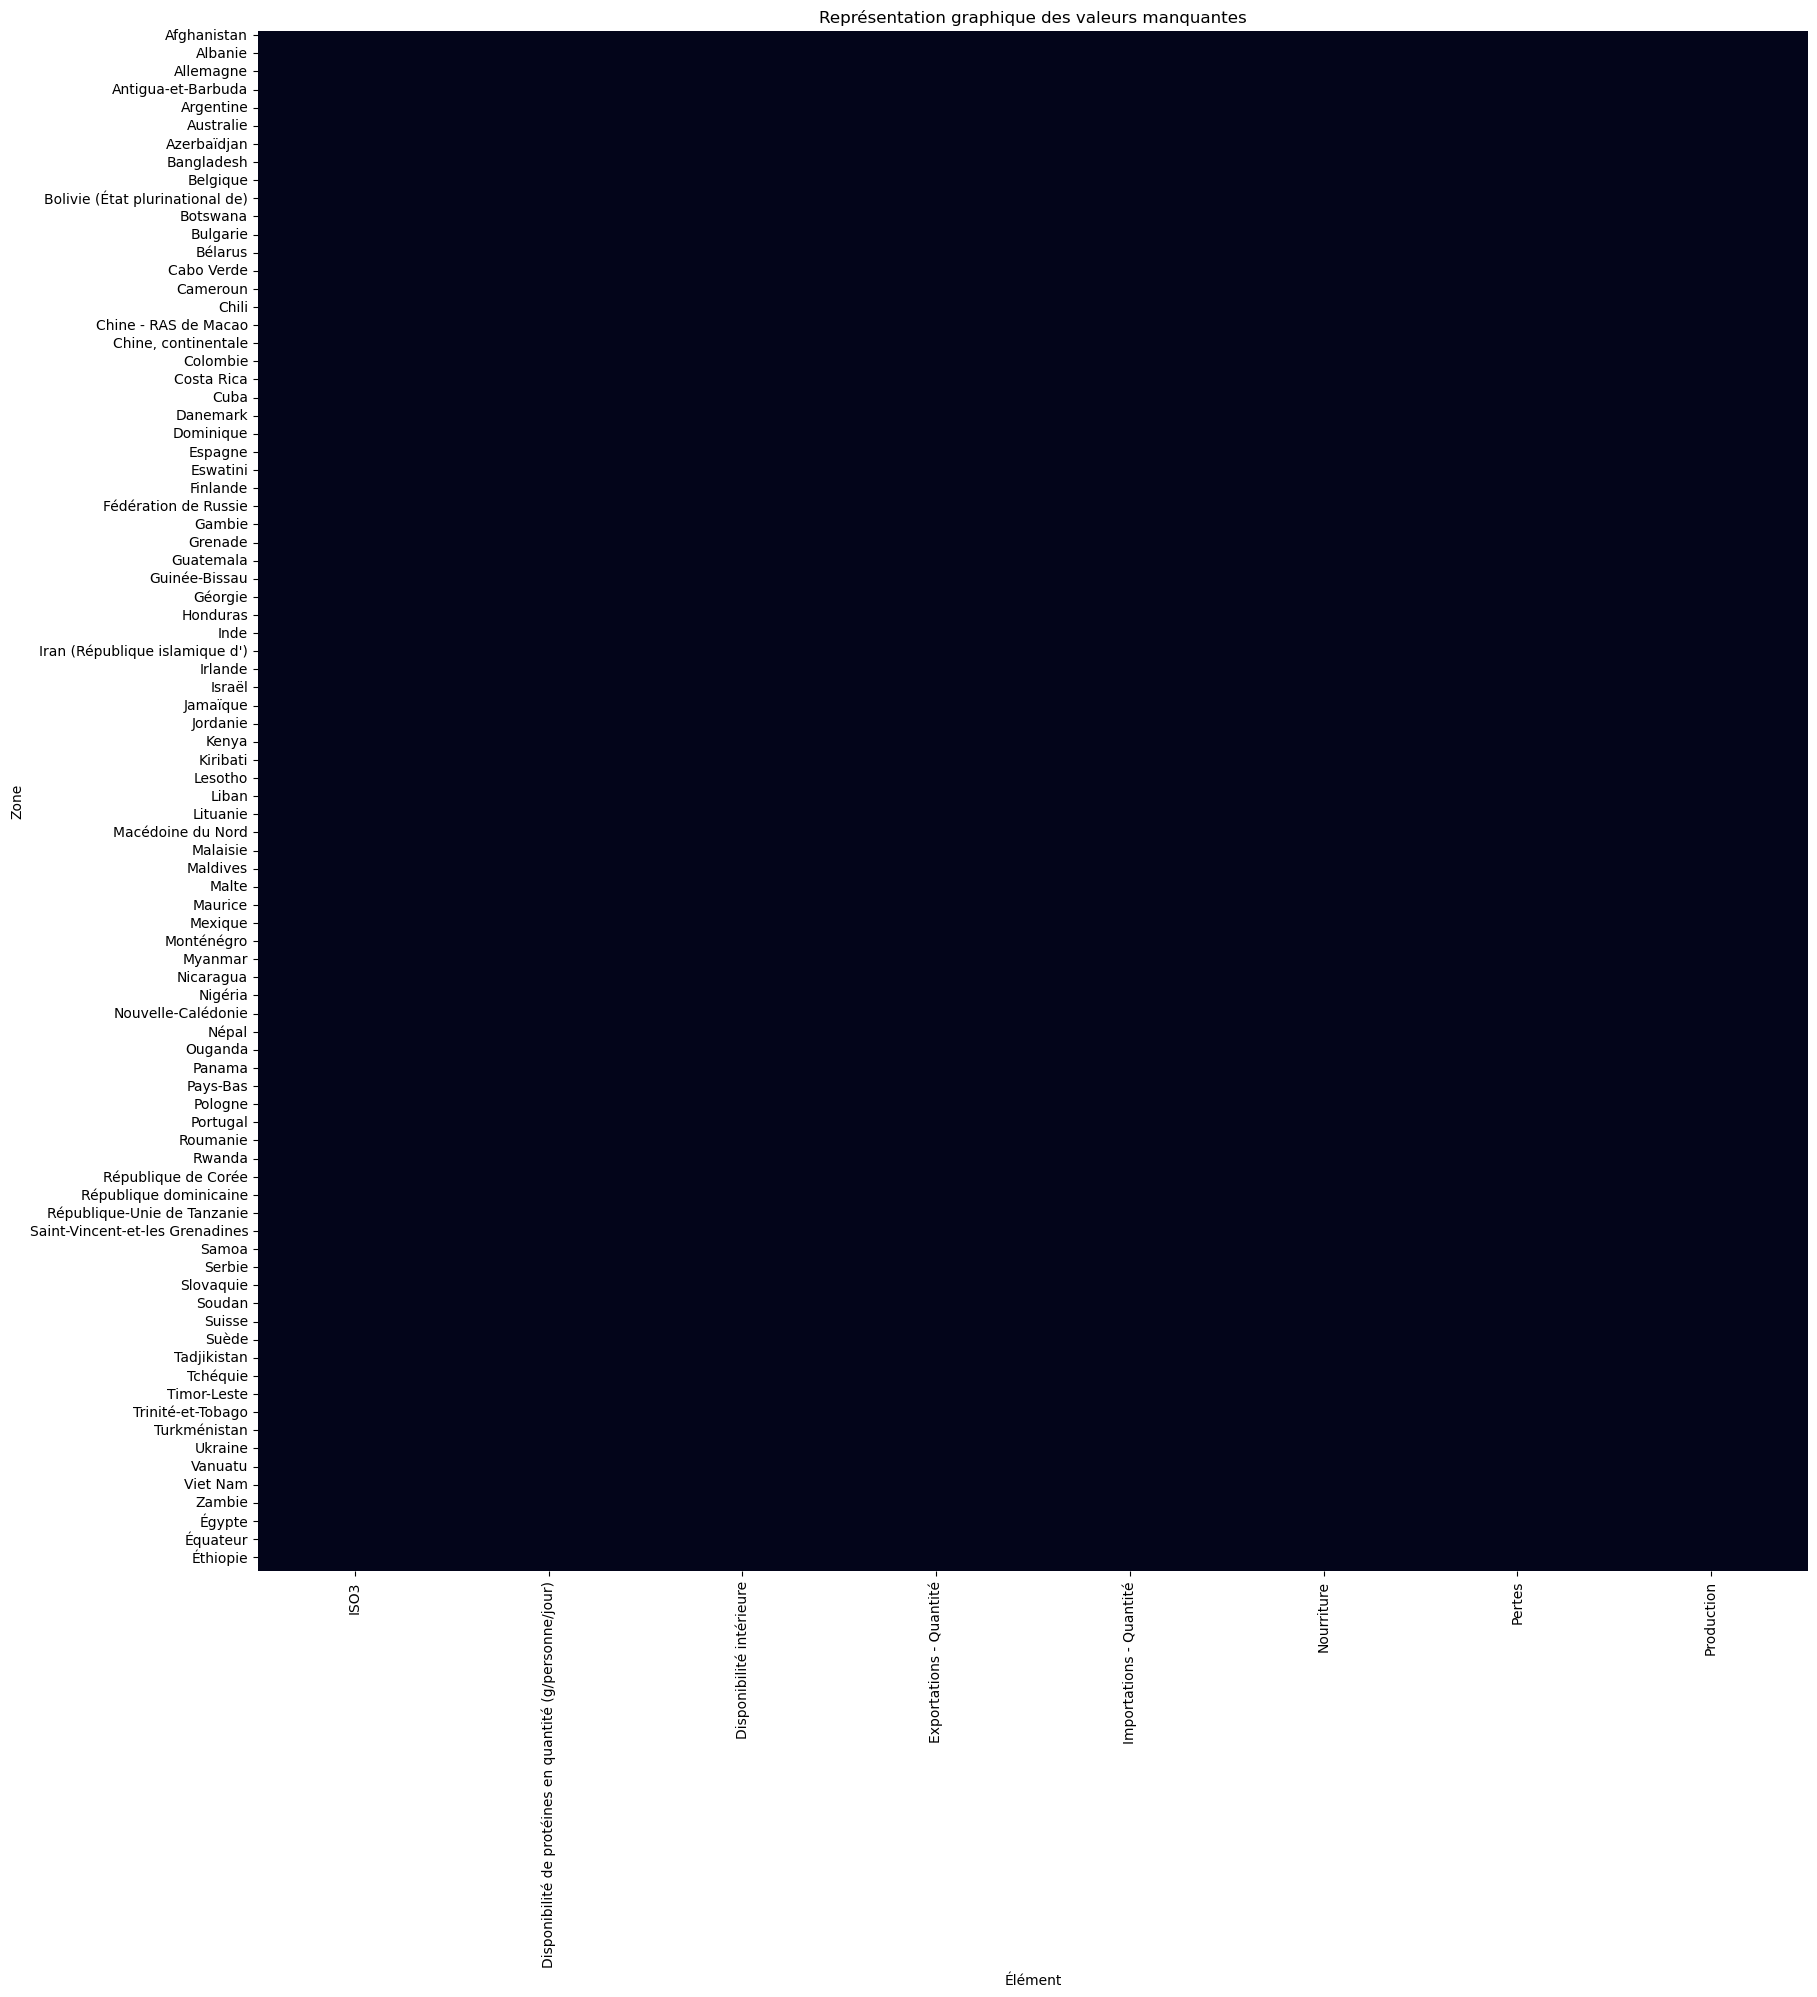

observations  variables  \
Élément                                                                       
Disponibilité de protéines en quantité (g/perso...           170          8   
Disponibilité intérieure                                     170          8   
Exportations - Quantité                                      170          8   
ISO3                                                         170          8   
Importations - Quantité                                      170          8   
Nourriture                                                   170          8   
Pertes                                                       170          8   
Production                                                   170          8   

                                                      moyennes  medianes  \
Élément                                                                    
Disponibilité de protéines en quantité (g/perso...    7.180235     6.585   
Disponibilité intérieure                            687.594118   100.000   
Exportations - Quantité                                    NaN     0.000   
ISO3                                                       NaN       NaN   
Importations - Quantité                              89.529412    16.000   
Nourriture                                          657.047059    99.500   
Pertes                                                     NaN     0.000   
Production                                                 NaN    68.000   

                                                    ecart_types   min  \
Élément                                                                 
Disponibilité de protéines en quantité (g/perso...     5.607475  0.04   
Disponibilité intérieure                            2187.184747   2.0   
Exportations - Quantité                                     NaN   NaN   
ISO3                                                        NaN   AFG   
Importations - Quantité                              186.669983   0.0   
Nourriture                                          2136.545796   2.0   
Pertes                                                      NaN   NaN   
Production                                                  NaN   NaN   

                                                        max  \
Élément                                                       
Disponibilité de protéines en quantité (g/perso...    27.87   
Disponibilité intérieure                            18266.0   
Exportations - Quantité                                 NaN   
ISO3                                                    ZWE   
Importations - Quantité                              1069.0   
Nourriture                                          18100.0   
Pertes                                                  NaN   
Production                                              NaN   

                                                    nb_valeurs_manquantes  \
Élément                                                                     
Disponibilité de protéines en quantité (g/perso...                      0   
Disponibilité intérieure                                                0   
Exportations - Quantité                                                 0   
ISO3                                                                    0   
Importations - Quantité                                                 0   
Nourriture                                                              0   
Pertes                                                                  0   
Production                                                              0   

                                                    %_valeurs_manquantes  
Élément                                                                   
Disponibilité de protéines en quantité (g/perso...                   0.0  
Disponibilité intérieure                                             0.0  
Exportations - Quantité                                            

In [13]:
my_first_analyse(df)

On s'apperçoit dans le tableau ci-dessous que certaines valeurs sont NaN alors que cela ne devrait normalement pas être possible. Il est possible que le type de donnée ne soit pas correcte. On vérifie

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170 entries, Afghanistan to Îles Salomon
Data columns (total 8 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   ISO3                                                      170 non-null    object 
 1   Disponibilité de protéines en quantité (g/personne/jour)  170 non-null    float64
 2   Disponibilité intérieure                                  170 non-null    float64
 3   Exportations - Quantité                                   170 non-null    object 
 4   Importations - Quantité                                   170 non-null    float64
 5   Nourriture                                                170 non-null    float64
 6   Pertes                                                    170 non-null    object 
 7   Production                                                170 non-null    object 
dtypes: floa

In [15]:
# On modifie donc le type de données
df[["Exportations - Quantité","Pertes","Production"]] = df[["Exportations - Quantité","Pertes","Production"]].astype(float)

Notre table n'a désormais plus de valeurs manquantes. Nous pouvons donc passer à la table Population

On procède de la même façon pour notre table population que pour notre table Disponibilité Intérieure :
- On procéde à un filtre pour l'année 2017
- On réalise un pivot :
    - Index : Zone
    - Colonne : Element
    - Values : Valeur

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170 entries, Afghanistan to Îles Salomon
Data columns (total 8 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   ISO3                                                      170 non-null    object 
 1   Disponibilité de protéines en quantité (g/personne/jour)  170 non-null    float64
 2   Disponibilité intérieure                                  170 non-null    float64
 3   Exportations - Quantité                                   170 non-null    float64
 4   Importations - Quantité                                   170 non-null    float64
 5   Nourriture                                                170 non-null    float64
 6   Pertes                                                    170 non-null    float64
 7   Production                                                170 non-null    float64
dtypes: floa

Les données sont au bon format

## Table Indicateurs Macro (PIB/PNB)

La table Indicateurs Macro va nous permettre de récupérer des données sur le niveau financier des pays (PIB, RNB). Ces informations vont nous permette d'aprécier la richesse économique des pays.

In [17]:
# On filtre sur l'année 2017
indic_macro2017 = indic_macro.loc[indic_macro["Année"]==2017]

# On selectionnes les variables qui nous interesse
indic_macro2017 = indic_macro2017[["Zone","Élément","Produit","Année","Unité","Valeur"]]

# On filtre de manière à ne récupérer que "Valeur US $ par habitant" et "Produit Intérieur Brut"
indic_macro2017 = indic_macro2017.loc[(indic_macro2017["Élément"]=="Valeur US $ par habitant") & (indic_macro2017["Produit"]=="Produit Intérieur Brut")]

# On réalise un pivot pour mettre en forme notre table
indic_macro2017 = indic_macro2017.pivot(index="Zone", columns=["Élément","Produit","Unité"], values="Valeur")

# On ajuste les noms des colonnes
indic_macro2017 = indic_macro2017.droplevel(["Unité","Élément"], axis=1)
indic_macro2017.columns.values[0]='Valeur US $ du PIB par habitant'

indic_macro2017 = indic_macro2017.reset_index()

display(indic_macro2017.head())
print(indic_macro2017.shape)

Produit            Zone  Valeur US $ du PIB par habitant
0           Afghanistan                       520.616409
1        Afrique du Sud                      6121.876572
2               Albanie                      4514.204908
3               Algérie                      4109.696001
4             Allemagne                     44651.829102

(211, 2)


/var/folders/hy/g05wz4ln30z1r5z3mv1rwd2h0000gn/T/ipykernel_52070/3125733484.py:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  moyennes = data.mean()
/var/folders/hy/g05wz4ln30z1r5z3mv1rwd2h0000gn/T/ipykernel_52070/3125733484.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  medianes = data.median()
/var/folders/hy/g05wz4ln30z1r5z3mv1rwd2h0000gn/T/ipykernel_52070/3125733484.py:15: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ecart_types = data.std()


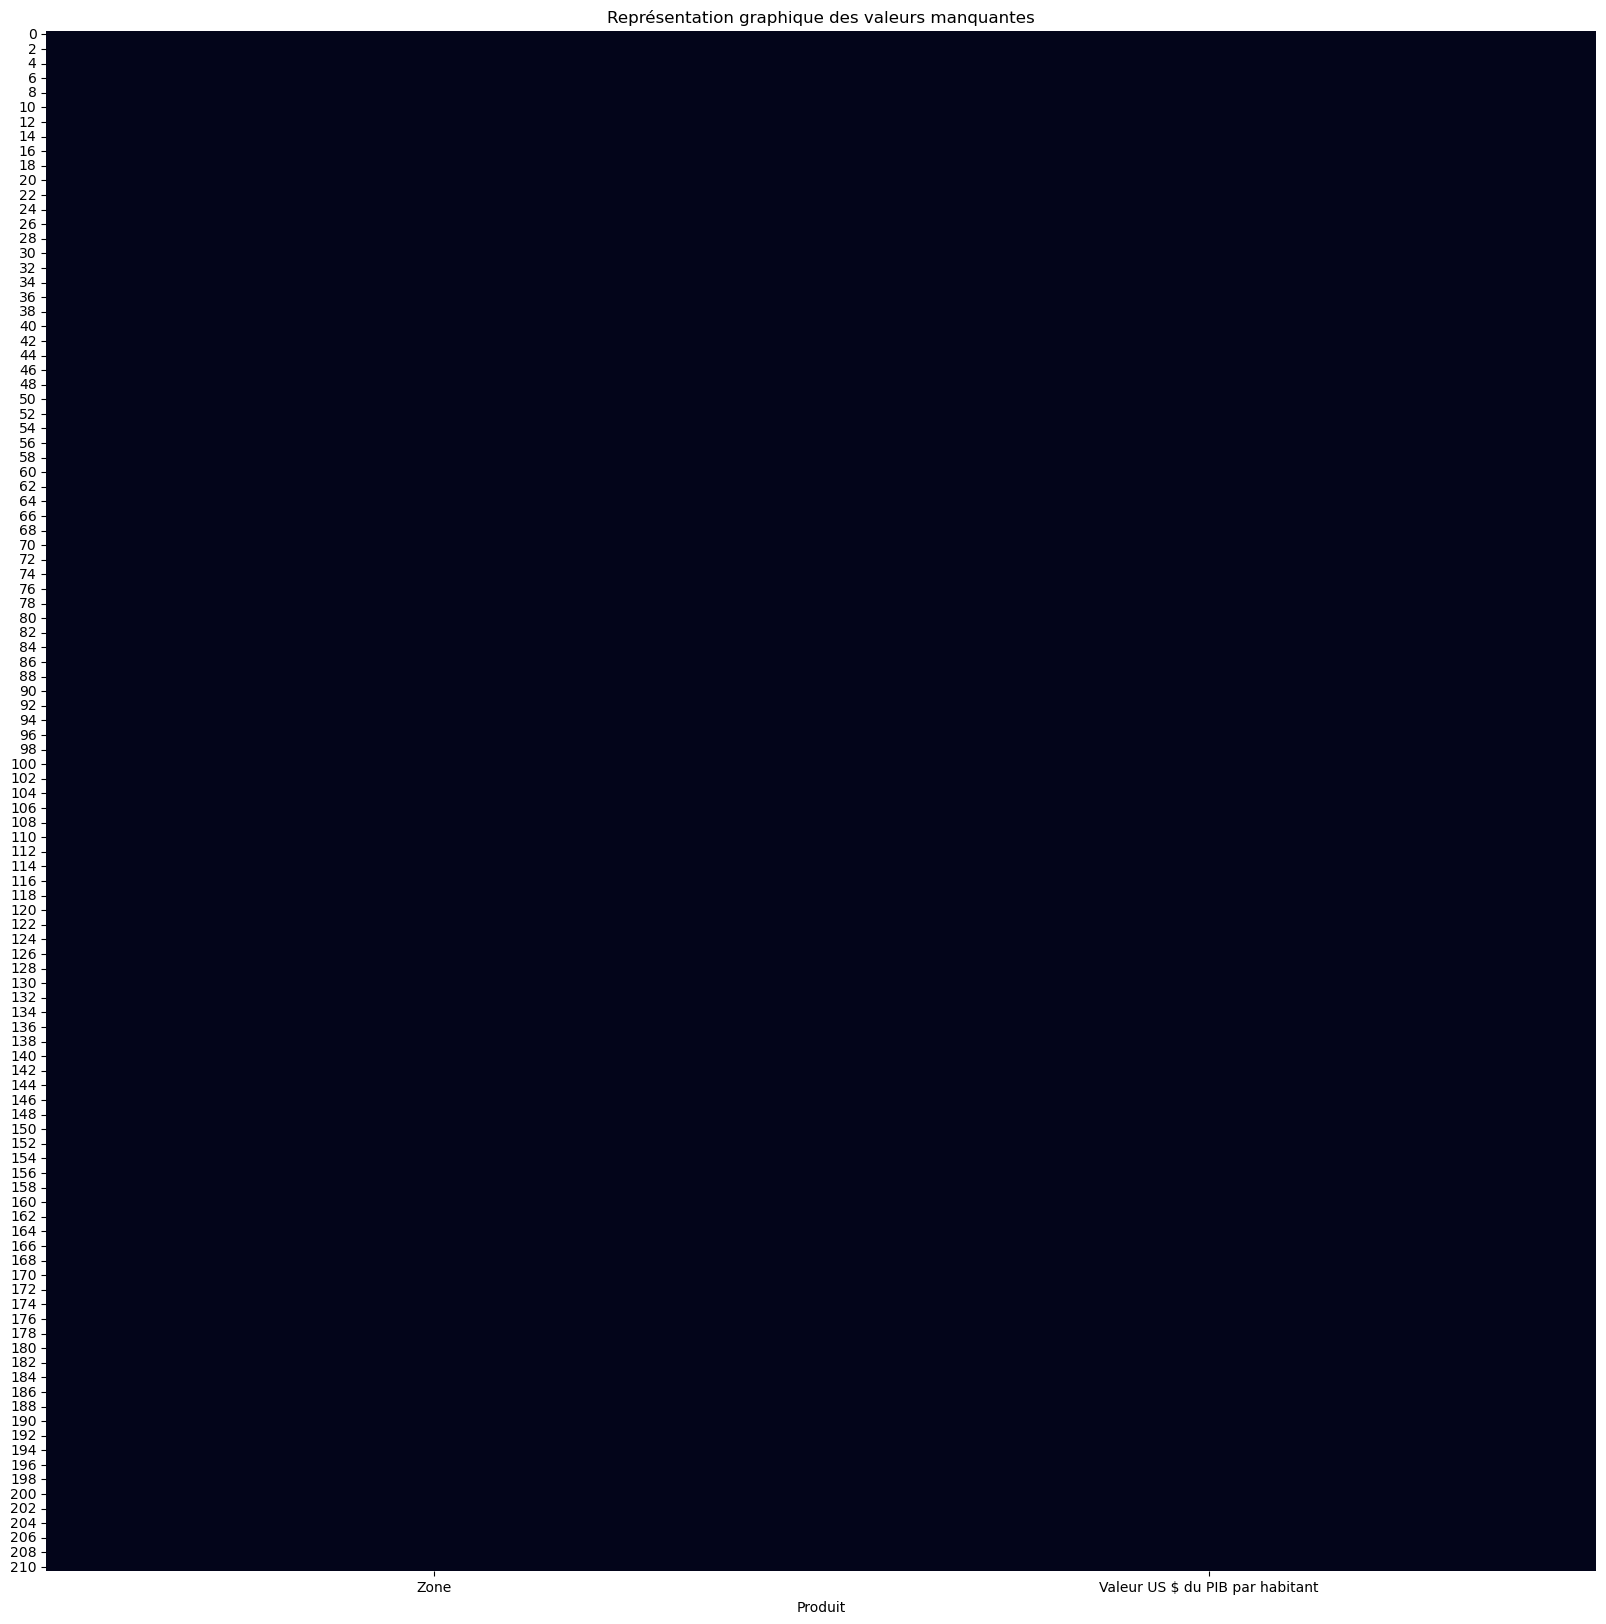

observations  variables      moyennes  \
Produit                                                                  
Valeur US $ du PIB par habitant           211          2  16934.384856   
Zone                                      211          2           NaN   

                                    medianes   ecart_types          min  \
Produit                                                                   
Valeur US $ du PIB par habitant  6376.707362  25494.984628   111.048078   
Zone                                     NaN           NaN  Afghanistan   

                                                       max  \
Produit                                                      
Valeur US $ du PIB par habitant              171278.066389   
Zone                             Îles Vierges britanniques   

                                 nb_valeurs_manquantes  %_valeurs_manquantes  
Produit                                                                       
Valeur US $ du PIB par habitant                      0                   0.0  
Zone                                                 0                   0.0

In [18]:
my_first_analyse(indic_macro2017)

## Table Vie Saine

La table "Vie Saine" va nous permette de récupérer des informations sur le coût de l'alimenation saine dans chaque pays. 

In [19]:
display(vie_saine.head())
print(vie_saine.shape)

Code Domaine                                            Domaine  \
0         CAHD  Coût et abordabilité d’une alimentation saine\...   
1         CAHD  Coût et abordabilité d’une alimentation saine\...   
2         CAHD  Coût et abordabilité d’une alimentation saine\...   
3         CAHD  Coût et abordabilité d’une alimentation saine\...   
4         CAHD  Coût et abordabilité d’une alimentation saine\...   

   Code zone (M49)            Zone  Code Élément Élément  Code Produit  \
0              710  Afrique du Sud          6226  Valeur          7004   
1              710  Afrique du Sud          6226  Valeur          7004   
2              710  Afrique du Sud          6226  Valeur          7004   
3              710  Afrique du Sud          6226  Valeur          7004   
4              710  Afrique du Sud          6226  Valeur          7007   

                                             Produit  Code année  Année  \
0  Cost of a healthy diet (PPP dollar per person ...        2017   2017   
1  Cost of a healthy diet (PPP dollar per person ...        2018   2018   
2  Cost of a healthy diet (PPP dollar per person ...        2019   2019   
3  Cost of a healthy diet (PPP dollar per person ...        2020   2020   
4                            Cost of starchy staples        2017   2017   

                           Unité  Valeur Symbole Description du Symbole  
0  PPP dollar per person per day   4.102       E         Valeur estimée  
1  PPP dollar per person per day   4.146       E         Valeur estimée  
2  PPP dollar per person per day   4.198       E         Valeur estimée  
3  PPP dollar per person per day   4.298       E         Valeur estimée  
4  PPP dollar per person per day   0.633       E         Valeur estimée

(3042, 14)


In [20]:
# On filtre sur l'année 2017
vie_saine_2017 = vie_saine.loc[vie_saine["Année"]==2017]

# On selectionne les variables qui nous interessent
vie_saine_2017 = vie_saine_2017[["Zone","Produit","Unité","Valeur"]]

# On pivot notre table
vie_saine_2017 = vie_saine_2017.pivot(index="Zone", columns=["Produit"], values="Valeur")

# On supprime les colonnes qui ne nous interessent pas
vie_saine_2017 = vie_saine_2017.drop(["Cost of fruits","Cost of legumes, nuts and seeds","Cost of oils and fats","Cost of starchy staples","Cost of vegetables","Number of people unable to afford a healthy diet (million)","Percentage of the population unable to afford a healthy diet (percent)"], axis=1)

# On renomme nos colonnes
vie_saine_2017.rename(columns={
    "Cost of a healthy diet (PPP dollar per person per day)":"Coût d'une alimentation équilibré (PPP dollar par personne par jour)",
    "Cost of animal source foods" : "Coût des aliments d'origine animale"
}, inplace=True)

vie_saine_2017 = vie_saine_2017.reset_index()

display(vie_saine_2017.head())
print(vie_saine_2017.shape)

Produit            Zone  \
0        Afrique du Sud   
1               Albanie   
2               Algérie   
3             Allemagne   
4                Angola   

Produit  Coût d'une alimentation équilibré (PPP dollar par personne par jour)  \
0                                                    4.102                      
1                                                    3.952                      
2                                                    3.763                      
3                                                    2.786                      
4                                                    4.327                      

Produit  Coût des aliments d'origine animale  
0                                      1.059  
1                                      1.204  
2                                      0.964  
3                                      0.666  
4                                      1.011

(169, 3)


/var/folders/hy/g05wz4ln30z1r5z3mv1rwd2h0000gn/T/ipykernel_52070/3125733484.py:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  moyennes = data.mean()
/var/folders/hy/g05wz4ln30z1r5z3mv1rwd2h0000gn/T/ipykernel_52070/3125733484.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  medianes = data.median()
/var/folders/hy/g05wz4ln30z1r5z3mv1rwd2h0000gn/T/ipykernel_52070/3125733484.py:15: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ecart_types = data.std()


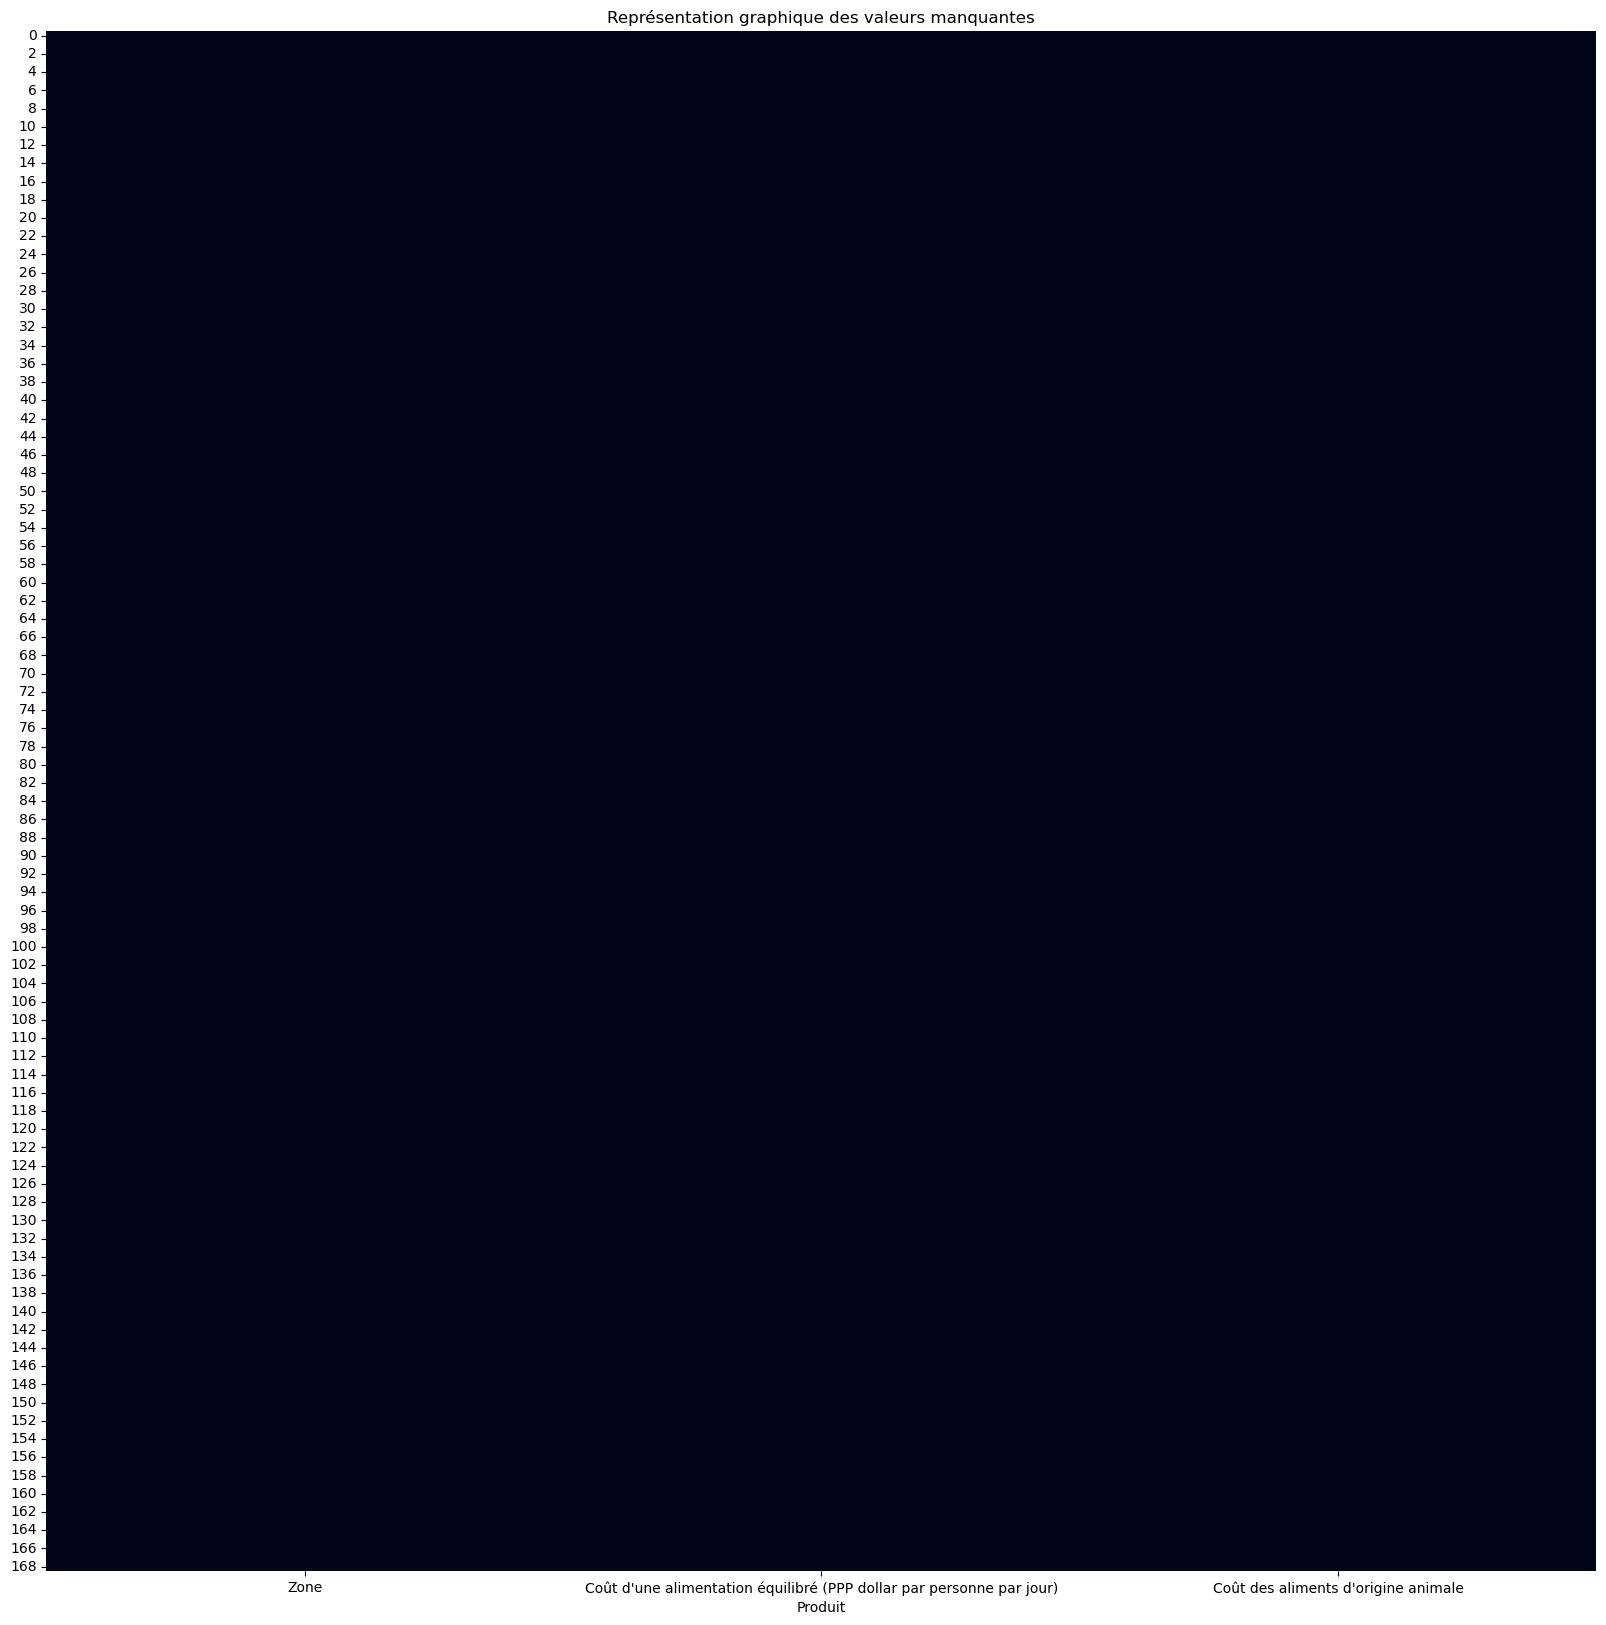

observations  variables  \
Produit                                                                       
Coût d'une alimentation équilibré (PPP dollar p...           169          3   
Coût des aliments d'origine animale                          169          3   
Zone                                                         169          3   

                                                    moyennes  medianes  \
Produit                                                                  
Coût d'une alimentation équilibré (PPP dollar p...  3.313834     3.235   
Coût des aliments d'origine animale                 0.873213     0.848   
Zone                                                     NaN       NaN   

                                                    ecart_types  \
Produit                                                           
Coût d'une alimentation équilibré (PPP dollar p...     0.656710   
Coût des aliments d'origine animale                    0.214233   
Zone                                                        NaN   

                                                               min  \
Produit                                                              
Coût d'une alimentation équilibré (PPP dollar p...           1.822   
Coût des aliments d'origine animale                          0.377   
Zone                                                Afrique du Sud   

                                                                          max  \
Produit                                                                         
Coût d'une alimentation équilibré (PPP dollar p...                      5.975   
Coût des aliments d'origine animale                                     1.583   
Zone                                                Îles Vierges britanniques   

                                                    nb_valeurs_manquantes  \
Produit                                                                     
Coût d'une alimentation équilibré (PPP dollar p...                      0   
Coût des aliments d'origine animale                                     0   
Zone                                                                    0   

                                                    %_valeurs_manquantes  
Produit                                                                   
Coût d'une alimentation équilibré (PPP dollar p...                   0.0  
Coût des aliments d'origine animale                                  0.0  
Zone                                                                 0.0

In [21]:
my_first_analyse(vie_saine_2017)

## Table Série Temporelle

In [22]:
display(series_temp.head())
print(series_temp.shape)

Code Domaine                       Domaine  Code zone (M49)         Zone  \
0           OA  Séries temporelles annuelles                4  Afghanistan   
1           OA  Séries temporelles annuelles                4  Afghanistan   
2           OA  Séries temporelles annuelles                4  Afghanistan   
3           OA  Séries temporelles annuelles                4  Afghanistan   
4           OA  Séries temporelles annuelles                4  Afghanistan   

   Code Élément             Élément  Code Produit                 Produit  \
0           511   Population totale          3010  Population-Estimations   
1           512              Hommes          3010  Population-Estimations   
2           513              Femmes          3010  Population-Estimations   
3           551   Population rurale          3010  Population-Estimations   
4           561  Population urbaine          3010  Population-Estimations   

   Code année  Année           Unité     Valeur Symbole  \
0        2017   2017  1000 personnes  35643.418       X   
1        2017   2017  1000 personnes  18028.696       X   
2        2017   2017  1000 personnes  17614.722       X   
3        2017   2017  1000 personnes  26558.609       X   
4        2017   2017  1000 personnes   8971.472       X   

              Description du Symbole  Note  
0  Ciffre de sources internationales   NaN  
1  Ciffre de sources internationales   NaN  
2  Ciffre de sources internationales   NaN  
3  Ciffre de sources internationales   NaN  
4  Ciffre de sources internationales   NaN

(1173, 15)


In [23]:
# On réalise un pivot sur notre table pour selectionner les valeurs que l'on souhaite voir apparaitre en colonne
series_temp = series_temp.pivot(index="Zone", columns="Élément", values="Valeur")

# on supprime les colonnes qui ne nous serviront pas
series_temp = series_temp.drop(["Femmes","Hommes","Population rurale"], axis=1)

series_temp = series_temp.reset_index()

display(series_temp.head())
print(series_temp.shape)

Élément            Zone  Population totale  Population urbaine
0           Afghanistan          35643.418            8971.472
1        Afrique du Sud          56641.209           37348.154
2               Albanie           2879.355            1740.032
3               Algérie          41136.546           29770.610
4             Allemagne          82624.374           63442.124

(236, 3)


## Elevage poulet

In [24]:
display(elevage_poulet.head())
print(elevage_poulet.shape)

Code Domaine                   Domaine  Code zone (M49)         Zone  \
0           EK  Tendances dans l’élevage                4  Afghanistan   
1           EK  Tendances dans l’élevage                4  Afghanistan   
2           EK  Tendances dans l’élevage                4  Afghanistan   
3           EK  Tendances dans l’élevage                4  Afghanistan   
4           EK  Tendances dans l’élevage                4  Afghanistan   

   Code Élément                                          Élément  \
0          7213  Densité des animaux dans la superficie agricole   
1          7213  Densité des animaux dans la superficie agricole   
2          7213  Densité des animaux dans la superficie agricole   
3          7213  Densité des animaux dans la superficie agricole   
4          7213  Densité des animaux dans la superficie agricole   

   Code Produit (CPC)  Produit  Code année  Année   Unité  Valeur Symbole  \
0                2151  Poulets        2014   2014  UGB/ha     0.0       E   
1                2151  Poulets        2015   2015  UGB/ha     0.0       E   
2                2151  Poulets        2016   2016  UGB/ha     0.0       E   
3                2151  Poulets        2017   2017  UGB/ha     0.0       E   
4                2151  Poulets        2018   2018  UGB/ha     0.0       E   

  Description du Symbole  
0         Valeur estimée  
1         Valeur estimée  
2         Valeur estimée  
3         Valeur estimée  
4         Valeur estimée

(2653, 14)


In [25]:
# On filtre nos données sur l'année 2017 et on souhaite récupérer seulement la variable "Part du total des animaux"
elevage_poulet_2017 = elevage_poulet.loc[(elevage_poulet["Année"]==2017)&(elevage_poulet["Élément"]=="Part du total des animaux")]

# On réalise un pivot pour mettre en colonnes les variables Elements et Unité
elevage_poulet_2017 = elevage_poulet_2017.pivot(index="Zone", columns=["Élément","Unité"], values="Valeur")

# On retire un niveau de nom de colonne
elevage_poulet_2017 = elevage_poulet_2017.droplevel(["Unité"], axis=1)

# On renome notre colonne
elevage_poulet_2017.rename(columns={
    "Part du total des animaux":"Part de l'élevage de poulet (%)"
}, inplace=True)

display(elevage_poulet_2017.head())
print(elevage_poulet_2017.shape)

Élément         Part de l'élevage de poulet (%)
Zone                                           
Afghanistan                                2.04
Afrique du Sud                            12.53
Albanie                                   10.54
Algérie                                   21.35
Allemagne                                  7.99

(195, 1)


On vérifie s'il n'y a pas de valeur manquante

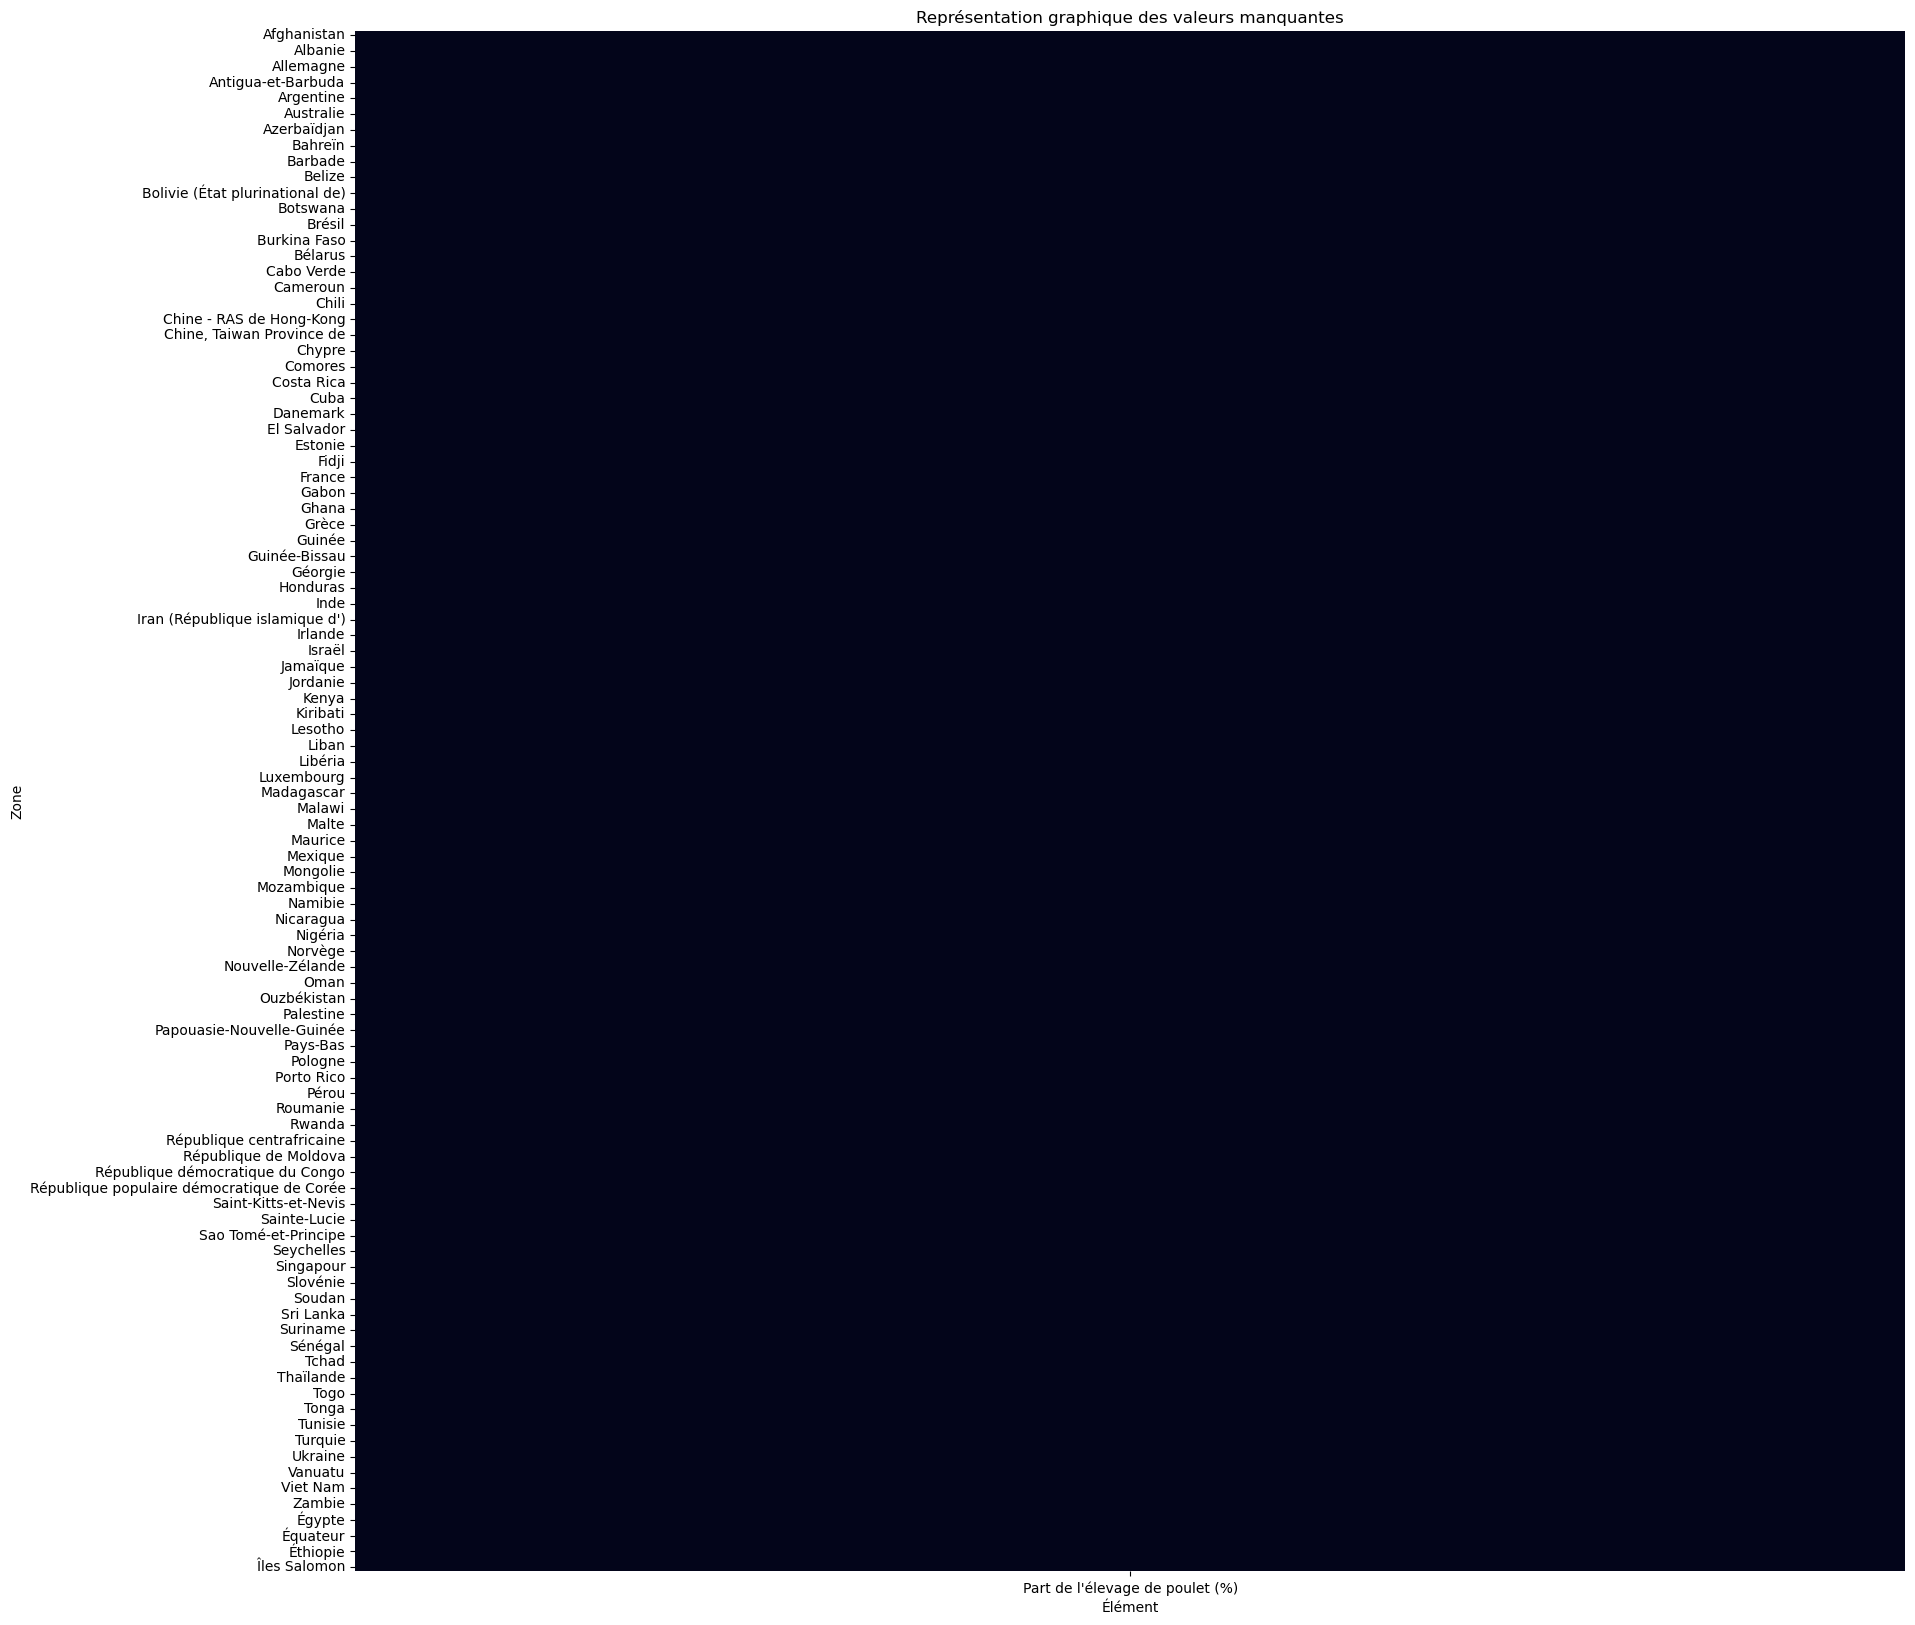

observations  variables   moyennes  medianes  \
Élément                                                                         
Part de l'élevage de poulet (%)           195          1  19.458615     12.26   

                                 ecart_types   min    max  \
Élément                                                     
Part de l'élevage de poulet (%)    21.739646  0.06  100.0   

                                 nb_valeurs_manquantes  %_valeurs_manquantes  
Élément                                                                       
Part de l'élevage de poulet (%)                      0                   0.0

In [26]:
my_first_analyse(elevage_poulet_2017)

## Stabilité Politique

In [27]:
display(stabilité_politique.head())
print(stabilité_politique.shape)

Unnamed: 0  Year  Political_Stability Granularity Unnamed: 4
0  Afghanistan  2000                -2.44       Total        NaN
1  Afghanistan  2002                -2.04       Total        NaN
2  Afghanistan  2003                -2.20       Total        NaN
3  Afghanistan  2004                -2.30       Total        NaN
4  Afghanistan  2005                -2.07       Total        NaN

(3150, 5)


In [28]:
# On filtre sur l'année 2017
stabilité_politique_2017 = stabilité_politique.loc[stabilité_politique["Year"]=="2017"]

# On retire les colonnes qui ne nous seront pas nécessaire
stabilité_politique_2017 = stabilité_politique_2017.drop(["Granularity","Unnamed: 4","Year"], axis=1)

# On renome notre colonne
stabilité_politique_2017.rename(columns={
    "Unnamed: 0":"Zone"
}, inplace=True)


display(stabilité_politique_2017.head())
print(stabilité_politique_2017.shape)

Zone  Political_Stability
16        Afghanistan                -2.80
34            Albanie                 0.38
52            Algérie                -0.92
67  Samoa américaines                 1.22
85            Andorre                 1.42

(173, 2)


## Distance France-Monde

La table Distance France-Monde nous présente le nombre de Km entre la France et le reste des pays du monde. Cette données nous sera utile dans un second temps pour définir les pays dans lequel il pourrait être le plus interessant de se pencher pour des questions de coût logistique. 

In [29]:
display(distance_fr_monde.head())
print(distance_fr_monde.shape)

ISO3  distance_km
0  ABW  7677.486897
1  AFG  5594.223377
2  AGO  6478.953877
3  AIA  6710.883702
4  ALB  1603.944535

(235, 2)


In [30]:
distance_fr_monde.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ISO3         235 non-null    object 
 1   distance_km  235 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.8+ KB


## Jointure

In [31]:
# On réalise la jointure des table df et indic_macro2017
df = df.merge(indic_macro2017, how="left", on="Zone")

# On réalise la jointure des table df et vie_saine_2017
df = df.merge(vie_saine_2017, how="left", on="Zone")

# On réalise la jointure des table df et series_temp
df = df.merge(series_temp, how="left", on="Zone")

# On réalise la jointure des table df et elevage_poulet_2017
df = df.merge(elevage_poulet_2017, how="left", on="Zone")

# On réalise la jointure des table df et stabilité_politique_2017
df = df.merge(stabilité_politique_2017, how="left", on="Zone")

# On réalise la jointure des table df et distance_fr_monde
df = df.merge(distance_fr_monde, on="ISO3")

display(df.head())
print(df.shape)

Zone ISO3  \
0     Afghanistan  AFG   
1  Afrique du Sud  ZAF   
2         Albanie  ALB   
3         Algérie  DZA   
4       Allemagne  DEU   

   Disponibilité de protéines en quantité (g/personne/jour)  \
0                                               0.54          
1                                              14.11          
2                                               6.26          
3                                               1.97          
4                                               7.96          

   Disponibilité intérieure  Exportations - Quantité  Importations - Quantité  \
0                      57.0                      0.0                     29.0   
1                    2118.0                     63.0                    514.0   
2                      47.0                      0.0                     38.0   
3                     277.0                      0.0                      2.0   
4                    1739.0                    646.0                    842.0   

   Nourriture  Pertes  Production  Valeur US $ du PIB par habitant  \
0        55.0     2.0        28.0                       520.616409   
1      2035.0    83.0      1667.0                      6121.876572   
2        47.0     0.0        13.0                      4514.204908   
3       264.0    13.0       275.0                      4109.696001   
4      1609.0     0.0      1514.0                     44651.829102   

   Coût d'une alimentation équilibré (PPP dollar par personne par jour)  \
0                                                NaN                      
1                                              4.102                      
2                                              3.952                      
3                                              3.763                      
4                                              2.786                      

   Coût des aliments d'origine animale  Population totale  Population urbaine  \
0                                  NaN          35643.418            8971.472   
1                                1.059          56641.209           37348.154   
2                                1.204           2879.355            1740.032   
3                                0.964          41136.546           29770.610   
4                                0.666          82624.374           63442.124   

   Part de l'élevage de poulet (%)  Political_Stability  distance_km  
0                             2.04                -2.80  5594.223377  
1                            12.53                -0.28  9306.638530  
2                            10.54                 0.38  1603.944535  
3                            21.35                -0.92  1345.460397  
4                             7.99                 0.59   880.634838

(168, 17)


In [32]:
df.loc[df["Zone"]=="France"]

Zone ISO3  Disponibilité de protéines en quantité (g/personne/jour)  \
51  France  FRA                                               8.95          

    Disponibilité intérieure  Exportations - Quantité  \
51                    1573.0                    501.0   

    Importations - Quantité  Nourriture  Pertes  Production  \
51                    506.0      1485.0     0.0      1750.0   

    Valeur US $ du PIB par habitant  \
51                     38720.645922   

    Coût d'une alimentation équilibré (PPP dollar par personne par jour)  \
51                                              2.936                      

    Coût des aliments d'origine animale  Population totale  \
51                                 0.64          64144.086   

    Population urbaine  Part de l'élevage de poulet (%)  Political_Stability  \
51           52100.536                            10.27                 0.28   

    distance_km  
51          0.0

In [33]:
# On supprime la colonne ISO3 qui ne nous est plus utilie
df = df.drop("ISO3", axis=1)

# On redéfinit la colonne Zone comme étant notre index
df = df.set_index("Zone")

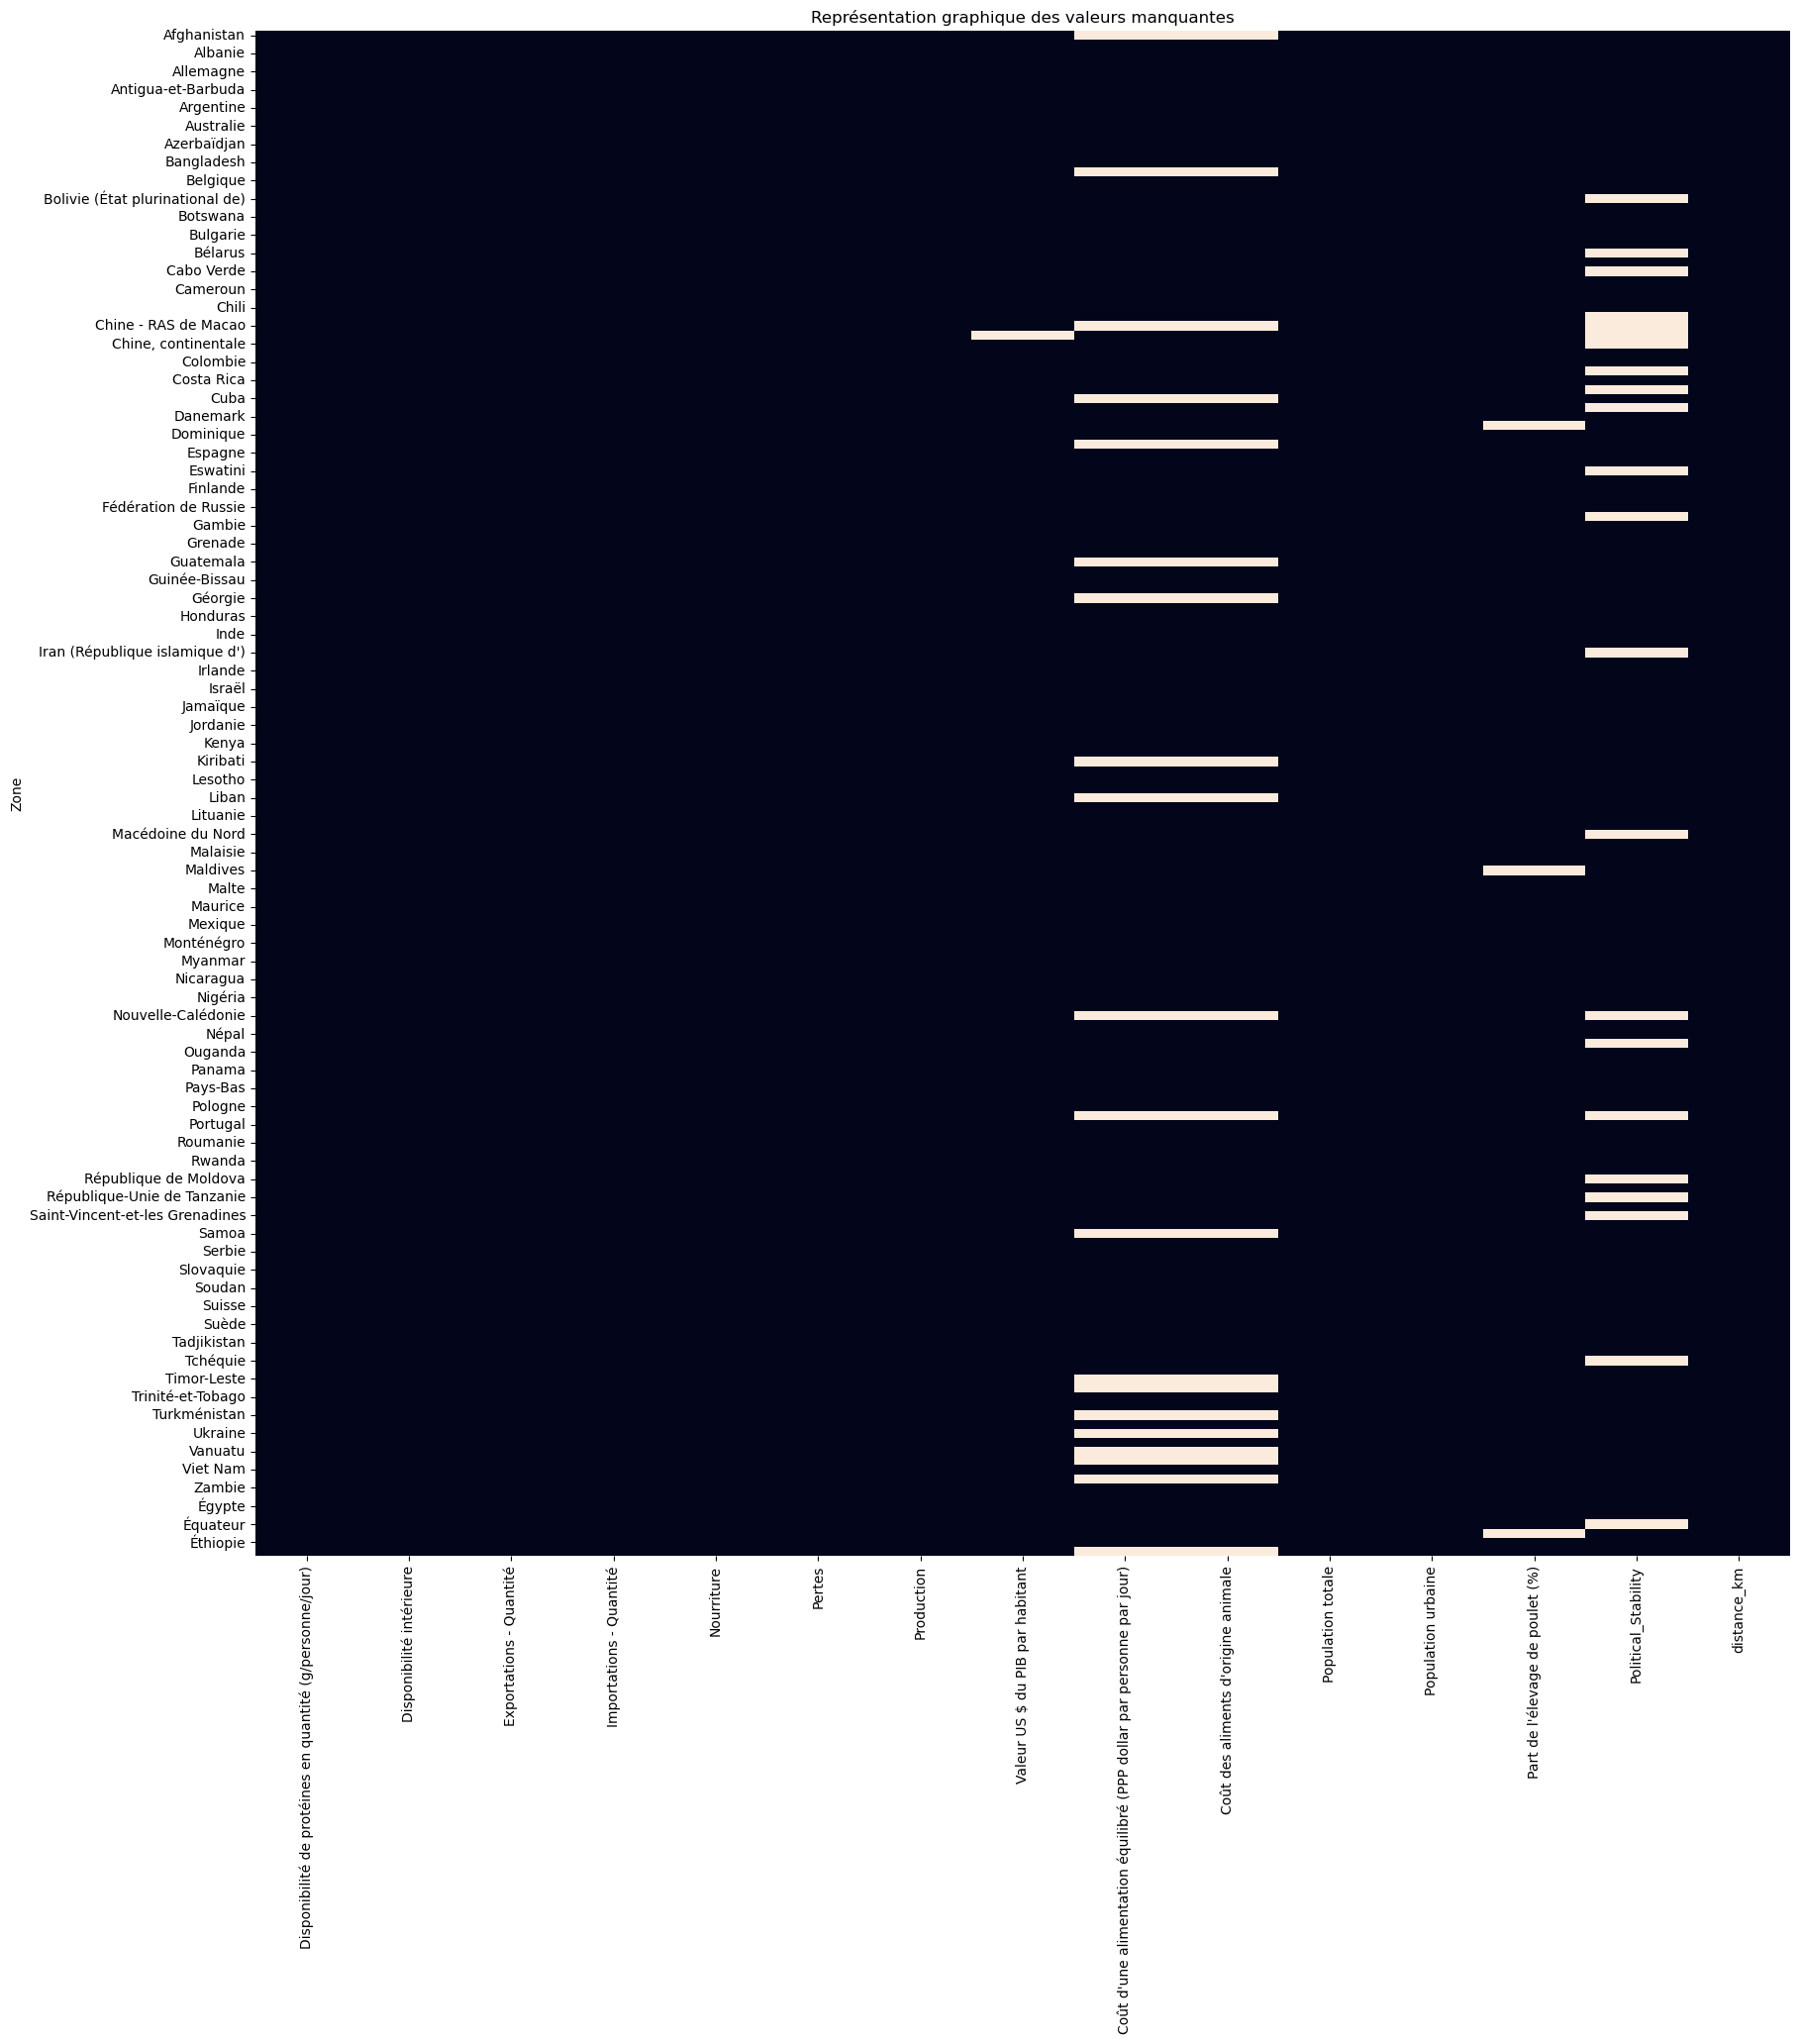

observations  variables  \
Disponibilité de protéines en quantité (g/perso...           168         15   
Disponibilité intérieure                                     168         15   
Exportations - Quantité                                      168         15   
Importations - Quantité                                      168         15   
Nourriture                                                   168         15   
Pertes                                                       168         15   
Production                                                   168         15   
Valeur US $ du PIB par habitant                              168         15   
Coût d'une alimentation équilibré (PPP dollar p...           168         15   
Coût des aliments d'origine animale                          168         15   
Population totale                                            168         15   
Population urbaine                                           168         15   
Part de l'élevage de poulet (%)                              168         15   
Political_Stability                                          168         15   
distance_km                                                  168         15   

                                                        moyennes     medianes  \
Disponibilité de protéines en quantité (g/perso...      7.228988     6.680000   
Disponibilité intérieure                              690.440476   100.000000   
Exportations - Quantité                               106.184524     0.000000   
Importations - Quantité                                89.779762    16.000000   
Nourriture                                            659.541667    99.500000   
Pertes                                                 17.375000     0.000000   
Production                                            719.946429    68.000000   
Valeur US $ du PIB par habitant                     14160.367615  6121.876572   
Coût d'une alimentation équilibré (PPP dollar p...      3.279291     3.184000   
Coût des aliments d'origine animale                     0.872101     0.850500   
Population totale                                   43435.235774  9748.408500   
Population urbaine                                  23678.498250  5228.701500   
Part de l'élevage de poulet (%)                        18.848121    12.260000   
Political_Stability                                    -0.092808     0.035000   
distance_km                                          6008.019124  5577.584331   

                                                      ecart_types         min  \
Disponibilité de protéines en quantité (g/perso...       5.615733    0.040000   
Disponibilité intérieure                              2199.637667    2.000000   
Exportations - Quantité                                463.242667    0.000000   
Importations - Quantité                                187.620474    0.000000   
Nourriture                                            2148.717166    2.000000   
Pertes                                                  78.913102    0.000000   
Production                                            2502.138159    0.000000   
Valeur US $ du PIB par habitant                      19518.855239  450.900697   
Coût d'une alimentation équilibré (PPP dollar p...       0.645228    1.822000   
Coût des aliments d'origine animale                      0.211736    0.377000   
Population totale                                   155205.812533   47.785000   
Population urbaine                                   77312.998926   17.031000   
Part de l'élevage de poulet (%)                         20.714545    0.060000   
Political_Stability                                      0.929144   -2.940000   
distance_km                                           3955.311040    0.000000   

                                                             max  \
Disponibilité de protéines en quantité (g/perso...  2.787000e+01   
Disponibilité intérieure                            1.826

In [34]:
# On vérifie les valeurs manquantes de notre nouvelle table
my_first_analyse(df)

Notre jointure est réalisée et avons plusieurs valeurs manquantes. Je décide de les remplacer par la moyenne à l'aide de ma fonction my_missing_values(). J'en profite pour retirer la France des pays.

In [35]:
# On supprime la France de notre table. En effet, l'objectif est d'exporter nos produits à l'international
df.drop(df.loc[df.index=="France"].index, inplace=True)

In [36]:
# On traite les valeurs manquantes en remplaces les valeurs vides par la moyenne de chaque colonne
my_missing_values(df, apply_all=True, strategie="remplacer_par_moyenne")

Disponibilité de protéines en quantité (g/personne/jour)  \
Zone                                                                              
Afghanistan                                                         0.54          
Afrique du Sud                                                     14.11          
Albanie                                                             6.26          
Algérie                                                             1.97          
Allemagne                                                           7.96          
...                                                                  ...          
Émirats arabes unis                                                14.80          
Équateur                                                            6.15          
États-Unis d'Amérique                                              19.93          
Éthiopie                                                            0.04          
Îles Salomon                                                        1.51          

                       Disponibilité intérieure  Exportations - Quantité  \
Zone                                                                       
Afghanistan                                57.0                      0.0   
Afrique du Sud                           2118.0                     63.0   
Albanie                                    47.0                      0.0   
Algérie                                   277.0                      0.0   
Allemagne                                1739.0                    646.0   
...                                         ...                      ...   
Émirats arabes unis                       412.0                     94.0   
Équateur                                  341.0                      0.0   
États-Unis d'Amérique                   18266.0                   3692.0   
Éthiopie                                   14.0                      0.0   
Îles Salomon                                3.0                      0.0   

                       Importations - Quantité  Nourriture  Pertes  \
Zone                                                                 
Afghanistan                               29.0        55.0     2.0   
Afrique du Sud                           514.0      2035.0    83.0   
Albanie                                   38.0        47.0     0.0   
Algérie                                    2.0       264.0    13.0   
Allemagne                                842.0      1609.0     0.0   
...                                        ...         ...     ...   
Émirats arabes unis                      433.0       412.0     0.0   
Équateur                                   0.0       324.0    17.0   
États-Unis d'Amérique                    123.0     18100.0     0.0   
Éthiopie                                   1.0        14.0     1.0   
Îles Salomon                               6.0         3.0     0.0   

                       Production  Valeur US $ du PIB par habitant  \
Zone                                                                 
Afghanistan                  28.0                       520.616409   
Afrique du Sud             1667.0                      6121.876572   
Albanie                      13.0                      4514.204908   
Algérie                     275.0                      4109.696001   
Allemagne                  1514.0                     44651.829102   
...                           ...                              ...   
Émirats arabes unis          48.0                     40644.804043   
Équateur                    340.0                      6213.501276   
États-Unis d'Amérique     21914.0                     59921.674703   
Éthiopie                     14.0                       721.753494   
Îles Salomon                  0.0                      2332.873855   

                       Coût d'une alimentation équilibré (PPP dollar par personne par jour)  \
Zone                                 

# Analyse Univarié

Nous pouvons maintenant nous interesser de plus près à nos varibles en réalisant une analyse univarié grâce à ma fonction my_first_analyse

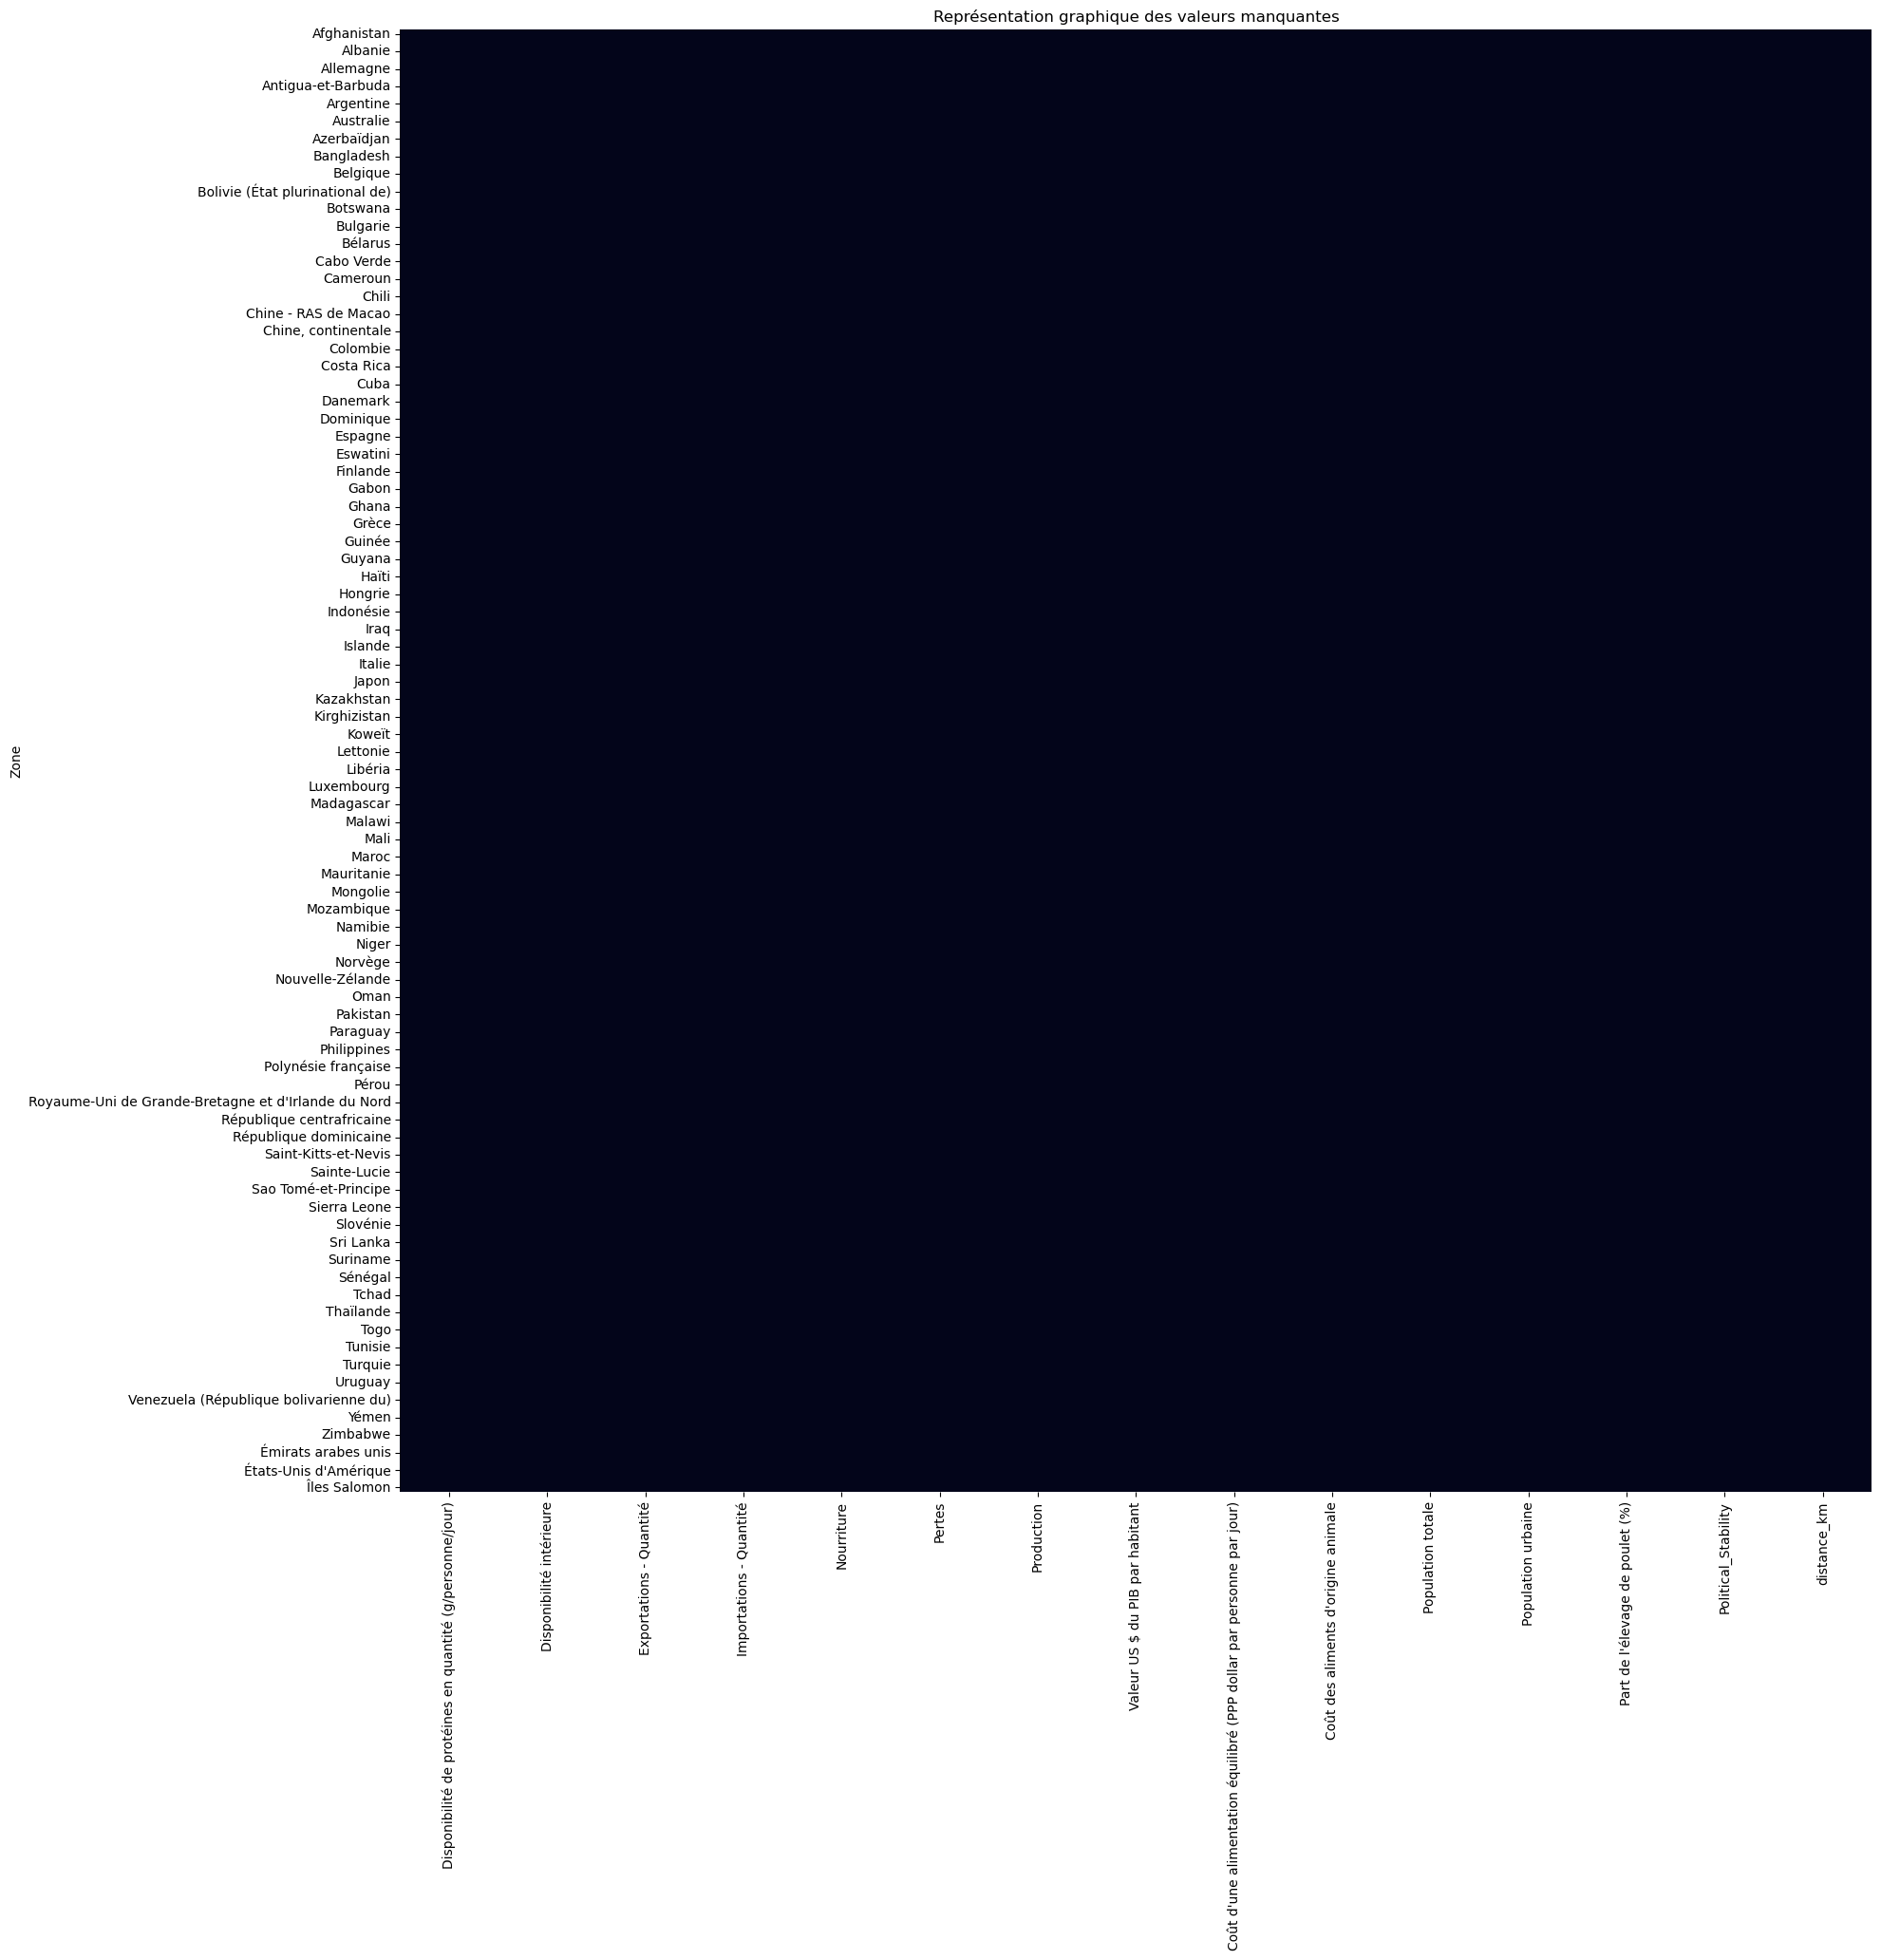

observations  variables  \
Disponibilité de protéines en quantité (g/perso...           167         15   
Disponibilité intérieure                                     167         15   
Exportations - Quantité                                      167         15   
Importations - Quantité                                      167         15   
Nourriture                                                   167         15   
Pertes                                                       167         15   
Production                                                   167         15   
Valeur US $ du PIB par habitant                              167         15   
Coût d'une alimentation équilibré (PPP dollar p...           167         15   
Coût des aliments d'origine animale                          167         15   
Population totale                                            167         15   
Population urbaine                                           167         15   
Part de l'élevage de poulet (%)                              167         15   
Political_Stability                                          167         15   
distance_km                                                  167         15   

                                                        moyennes     medianes  \
Disponibilité de protéines en quantité (g/perso...      7.218683     6.650000   
Disponibilité intérieure                              685.155689    98.000000   
Exportations - Quantité                               103.820359     0.000000   
Importations - Quantité                                87.287425    16.000000   
Nourriture                                            654.598802    98.000000   
Pertes                                                 17.479042     0.000000   
Production                                            713.778443    67.000000   
Valeur US $ du PIB par habitant                     14012.414131  6121.876572   
Coût d'une alimentation équilibré (PPP dollar p...      3.281626     3.281626   
Coût des aliments d'origine animale                     0.873680     0.873680   
Population totale                                   43311.230683  9707.876000   
Population urbaine                                  23508.306407  5226.646000   
Part de l'élevage de poulet (%)                        18.900427    12.900000   
Political_Stability                                    -0.095379    -0.095379   
distance_km                                          6043.995287  5585.295235   

                                                      ecart_types         min  \
Disponibilité de protéines en quantité (g/perso...       5.631029    0.040000   
Disponibilité intérieure                              2205.183111    2.000000   
Exportations - Quantité                                463.618213    0.000000   
Importations - Quantité                                185.374323    0.000000   
Nourriture                                            2154.221283    2.000000   
Pertes                                                  79.138877    0.000000   
Production                                            2508.382048    0.000000   
Valeur US $ du PIB par habitant                      19424.984964  450.900697   
Coût d'une alimentation équilibré (PPP dollar p...       0.606592    1.822000   
Coût des aliments d'origine animale                      0.198429    0.377000   
Population totale                                   155664.250298   47.785000   
Population urbaine                                   77513.948129   17.031000   
Part de l'élevage de poulet (%)                         20.578547    0.060000   
Political_Stability                                      0.867901   -2.940000   
distance_km                                           3939.540541  264.600808   

                                                             max  \
Disponibilité de protéines en quantité (g/perso...  2.787000e+01   
Disponibilité intérieure                            1.826

In [37]:
my_first_analyse(df, graphique=True)

# Traitement des outliers

In [38]:
# On recherche les outliers avec le Z-Score
outliers = my_outliers_zscore(df)
df_avec_scaling_sans_outliers = df.drop(outliers.index, axis=0)

# Scaling des données

Afin de pouvoir réaliser nos analyse futur, nous allons devoir scaler nos données. En effet, il existe une grand disparité entre les données. Nous allons pouvoir normaliser nos données à l'aide d'un standard_scaler()

In [39]:
df_avec_scaling_sans_outliers = my_data_scaler(df_avec_scaling_sans_outliers,scaler_all=True, method="standard")
display(df_avec_scaling_sans_outliers.head())
print(df_avec_scaling_sans_outliers.shape)

Disponibilité de protéines en quantité (g/personne/jour)  \
Zone                                                                           
Afrique du Sud                                               1.625052          
Albanie                                                     -0.005784          
Algérie                                                     -0.897031          
Angola                                                      -0.558399          
Antigua-et-Barbuda                                           2.385417          

                    Disponibilité intérieure  Exportations - Quantité  \
Zone                                                                    
Afrique du Sud                      2.800168                 0.067145   
Albanie                            -0.478132                -0.289646   
Algérie                            -0.114052                -0.289646   
Angola                             -0.047568                -0.289646   
Antigua-et-Barbuda                 -0.541450                -0.289646   

                    Importations - Quantité  Nourriture    Pertes  Production  \
Zone                                                                            
Afrique du Sud                     4.396787    2.796739  3.738527    1.981279   
Albanie                           -0.197698   -0.472500 -0.358299   -0.509646   
Algérie                           -0.545180   -0.115646  0.283372   -0.115074   
Angola                             2.109197   -0.031778 -0.259580   -0.465972   
Antigua-et-Barbuda                -0.496919   -0.541568 -0.358299   -0.529224   

                    Valeur US $ du PIB par habitant  \
Zone                                                  
Afrique du Sud                            -0.303250   
Albanie                                   -0.421034   
Algérie                                   -0.450670   
Angola                                    -0.451687   
Antigua-et-Barbuda                         0.375285   

                    Coût d'une alimentation équilibré (PPP dollar par personne par jour)  \
Zone                                                                                       
Afrique du Sud                                               1.679427                      
Albanie                                                      1.379306                      
Algérie                                                      1.001155                      
Angola                                                       2.129607                      
Antigua-et-Barbuda                                           1.699435                      

                    Coût des aliments d'origine animale  Population totale  \
Zone                                                                         
Afrique du Sud                                 0.957359           0.795539   
Albanie                                        1.720469          -0.516933   
Algérie                                        0.457390           0.417029   
Angola                                         0.704743           0.150249   
Antigua-et-Barbuda                            -1.026727          -0.585001   

                    Population urbaine  Part de l'élevage de poulet (%)  \
Zone                                                                      
Afrique du Sud                1.179845                        -0.241778   
Albanie                      -0.520768                        -0.362848   
Algérie                       0.817948                         0.294825   
Angola                        0.318437                        -0.458974   
Antigua-et-Barbuda           -0.602666                        -0.114015   

                    Political_Stability  distance_km  
Zone                                                  
Afrique du Sud                -0.185472     0.852839  
Albanie                        0.631264    -1.111730  
Algérie                       -0.977458    -1.177657  


(139, 15)


# Analyse Bivraié

In [40]:
#sns.pairplot(df, corner=True)

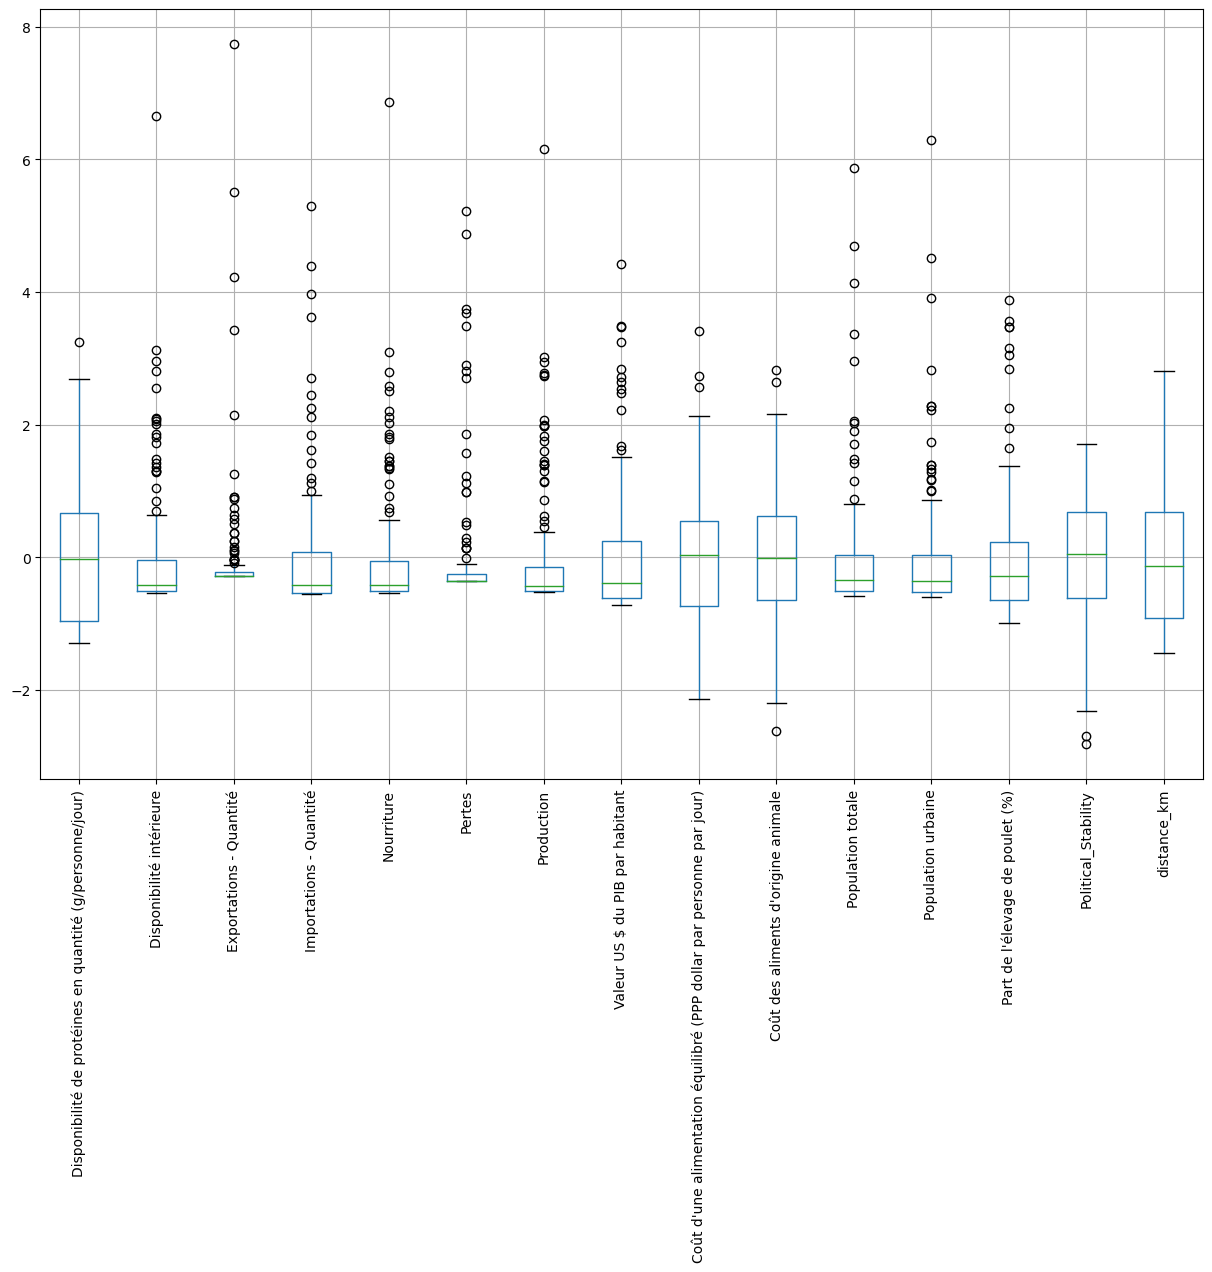

In [41]:
my_boxplots(df_avec_scaling_sans_outliers)

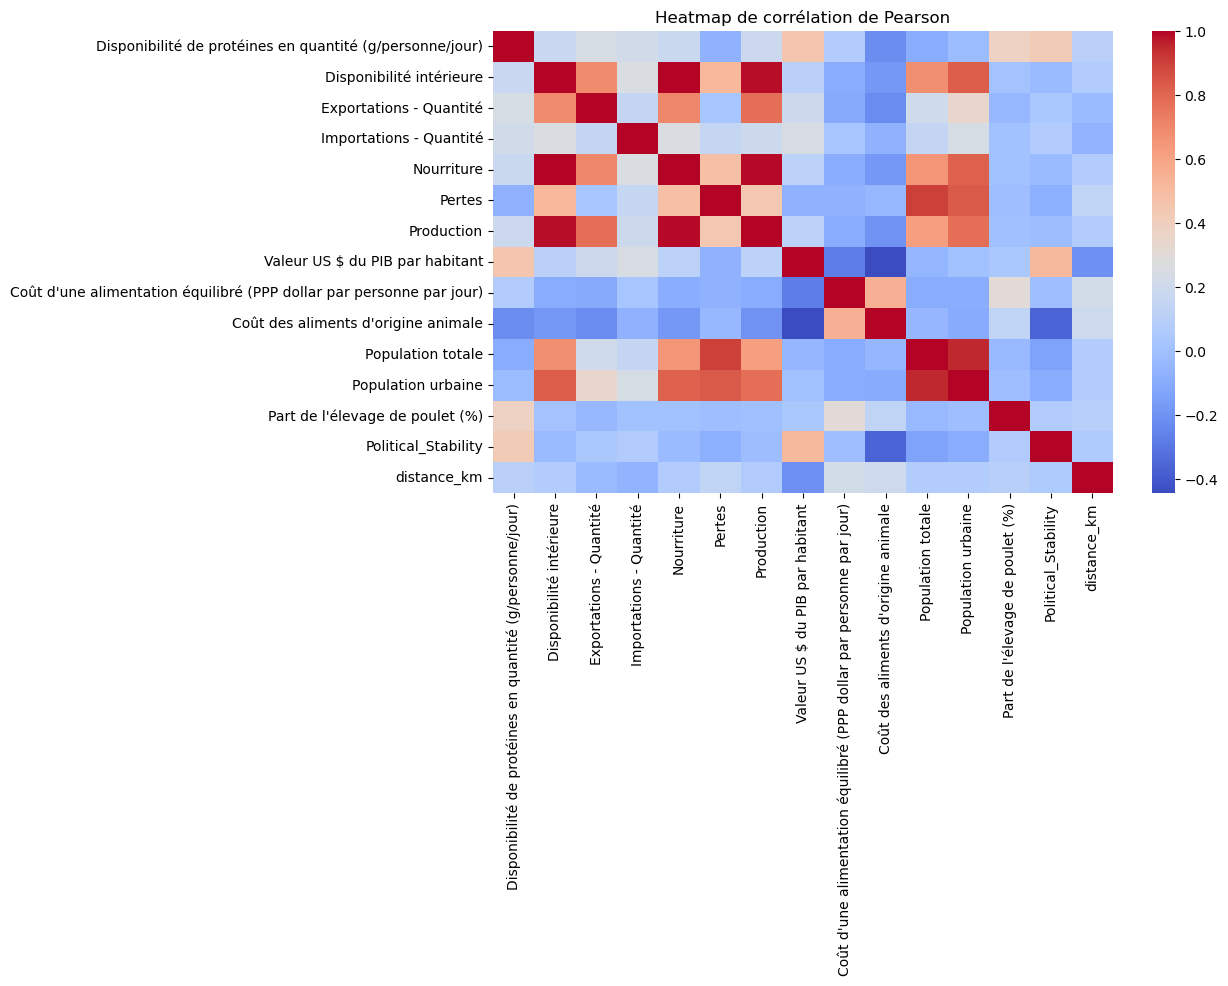

In [42]:
my_corr_heatmap(df_avec_scaling_sans_outliers, annot=False)

On constate des corrélations importantes entre les variables : 
- Nourriture et Disponibilité intérieure et Production
- Population totale et Pertes
- Production et Exportation - Quantité
- Exportation - Quantité et Disponibilité Intérieures
- Valeur US dol du PIB (en millions) et Disponibilité intérieure
- Valeur US dol du PIB (en millions) et Nourriture
- ...

# Export des données

In [43]:
# On exporte en CSV notre Table poour pouvoir l'utiliser dans un autre notebook. Rdv au Notebook : Morichon_Sébastien_2_clustering_visualisations_042023
df_avec_scaling_sans_outliers.to_csv("DonnéesGénérales.csv")